<a href="https://colab.research.google.com/github/mabhipsa12/Scorecard-Project/blob/main/scorecard_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

#📌 Step 1: Load and Explore the Datasets

Objective:\
1) Load the application_record.csv and credit_record.csv.\
2) Check basic details like shape, missing values, and data types.



app_df = pd.read_csv('/application_record.csv')
credit_df = pd.read_csv('/credit_record.csv')

In [3]:
import pandas as pd
import numpy as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# prompt: import application data as app_df and creditdata as credit_df

import pandas as pd
app_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_record.csv')
credit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_record.csv')


In [6]:
# Display first 5 rows of each dataset
print("\nApplication Data Sample:")
display(app_df.head())

print("\nCredit Data Sample:")
display(credit_df.head())


Application Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Credit Data Sample:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
# Check column types
print("\nData Types in Application Data:")
print(app_df.dtypes)

print("\nData Types in Credit Data:")
print(credit_df.dtypes)


Data Types in Application Data:
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Data Types in Credit Data:
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


In [8]:
# prompt: find null values in columns

# Check for null values in each column of the application dataset
print("\nNull Values in Application Data:")
print(app_df.isnull().sum())

# Check for null values in each column of the credit dataset
print("\nNull Values in Credit Data:")
print(credit_df.isnull().sum())



Null Values in Application Data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Null Values in Credit Data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


🔹 Findings from Data Exploration

*   The OCCUPATION_TYPE column has 134,203 missing values (a significant amount).
*   Other columns have no missing values, which is good.



In [9]:
# prompt: find the fill rate for both the dataset app_df and credit_df

# Calculate the fill rate for each dataset
def calculate_fill_rate(df):
  return (df.notnull().sum() / len(df)) * 100


print("Fill Rate for Application Data:")
print(calculate_fill_rate(app_df))
print("\nFill Rate for Credit Data:")
print(calculate_fill_rate(credit_df))


Fill Rate for Application Data:
ID                     100.000000
CODE_GENDER            100.000000
FLAG_OWN_CAR           100.000000
FLAG_OWN_REALTY        100.000000
CNT_CHILDREN           100.000000
AMT_INCOME_TOTAL       100.000000
NAME_INCOME_TYPE       100.000000
NAME_EDUCATION_TYPE    100.000000
NAME_FAMILY_STATUS     100.000000
NAME_HOUSING_TYPE      100.000000
DAYS_BIRTH             100.000000
DAYS_EMPLOYED          100.000000
FLAG_MOBIL             100.000000
FLAG_WORK_PHONE        100.000000
FLAG_PHONE             100.000000
FLAG_EMAIL             100.000000
OCCUPATION_TYPE         69.398961
CNT_FAM_MEMBERS        100.000000
dtype: float64

Fill Rate for Credit Data:
ID                100.0
MONTHS_BALANCE    100.0
STATUS            100.0
dtype: float64


#📌 Step 2: Data Cleaning

OBJECTIVE:

1.Handle missing values\
2.Convert data types if needed\
3.Remove duplicates

In [10]:
#Filling missing values of OCCUPATION_TYPE
mode_value = app_df['OCCUPATION_TYPE'].mode()[0]
app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

<ipython-input-10-bbc09de54286>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)


In [11]:
# Convert CNT_FAM_MEMBERS to integer
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].astype(int)

#📌 Step 3: Define Target Variables

In [12]:
# prompt: merge both datasets app_df and credit_df

import pandas as pd
# Merge the two datasets based on the ID column
merged_df = pd.merge(app_df, credit_df, on='ID', how='inner')

# Display the first few rows of the merged dataset
print("\nMerged Data Sample:")
display(merged_df.head())



Merged Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-4,C


In [13]:
#Defining the target variable
#The target variable is whether a customer has 90+ Days Past Due (DPD), which indicates a bad credit risk.
merged_df['Bad_Credit'] = merged_df['STATUS'].apply(lambda x: 1 if x in ['3', '4', '5'] else 0)


Bad_Credit
0    775688
1      2027
Name: count, dtype: int64


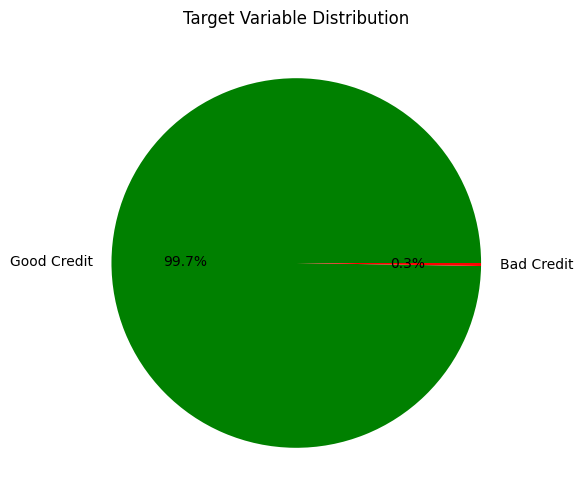

In [14]:
# Checking Class Distribution
print(merged_df['Bad_Credit'].value_counts())

merged_df['Bad_Credit'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green', 'red'],
    labels=['Good Credit', 'Bad Credit'],
    figsize=(6, 6)
)
plt.title("Target Variable Distribution")
plt.ylabel("")
plt.show()




**#Findings :**\
1.Since bad credit cases make up only 0.3% of the dataset, this indicates a severe class imbalance problem.\
2.If left unaddressed, machine learning models will likely favor the majority class (good credit) and fail to accurately predict bad credit cases.\
3.Hence we can handle this class imbalance further.

#📌 Step 4: Feature Engineering





In [15]:
# Convert DAYS_BIRTH to Age in Years
merged_df['AGE'] = (-merged_df['DAYS_BIRTH']) // 365

In [16]:
# calculate employement tenure as variable

merged_df['Employment_Tenure_Years'] = (-merged_df['DAYS_EMPLOYED']) // 365


In [17]:
#EMPLOYMENT_YEARS
merged_df['EMPLOYMENT_YEARS'] = merged_df['DAYS_EMPLOYED'].apply(lambda x: -x // 365 if x != 365243 else np.nan)


In [18]:
#YEARS_BEFORE_EMPLOYMENT(The difference between Age and Employment Duration)
merged_df['YEARS_BEFORE_EMPLOYMENT'] = merged_df['AGE'] - merged_df['Employment_Tenure_Years']

In [19]:
#EMPLOYMENT_STATUS
merged_df['EMPLOYMENT_STATUS'] = merged_df['DAYS_EMPLOYED'].apply(lambda x:
    'Unemployed' if x == 365243 else
    'Short-term' if x > -365*2 else
    'Mid-term' if x > -365*5 else
    'Long-term'
)


In [20]:
 # Employment stability ratio
merged_df['EMPLOYMENT_STABILITY'] = merged_df['Employment_Tenure_Years'] / merged_df['AGE']


In [21]:
# Debt-to-Income Ratio
merged_df['INCOME_PER_FAMILY_MEMBER'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['CNT_FAM_MEMBERS']


In [22]:
# Max Delinquency Level
merged_df['MAX_DELINQUENCY'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: max(x))


In [23]:
#Credit History Length
merged_df['CREDIT_HISTORY_LENGTH'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform(lambda x: abs(min(x)))


In [24]:
#INCOME PER CHILD
merged_df['INCOME_PER_CHILD'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['CNT_CHILDREN'] + 1)
#Note:  Why +1? To avoid division by zero when there are no children.

In [25]:
#INCOME PER FAMILY MEMBER
merged_df['INCOME_PER_FAMILY_MEMBER'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['CNT_FAM_MEMBERS']


In [26]:
#INCOME TO AGE RATIO
merged_df['INCOME_TO_AGE_RATIO'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['AGE']
#Higher values indicate higher earnings relative to the applicant's age.

In [27]:
 #INCOME TO EMPLOYMENT RATIO
merged_df['INCOME_TO_EMPLOYMENT_RATIO'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['Employment_Tenure_Years'] + 1)


In [28]:
#INCOME_PER_YEAR
merged_df['INCOME_PER_YEAR'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['AGE']


In [29]:
#HOUSE_OWNERSHIP_IMPACT
merged_df['HOUSE_OWNERSHIP_IMPACT'] = merged_df['AMT_INCOME_TOTAL'] * merged_df['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)


In [30]:
#CAR_OWNERSHIP_IMPACT
merged_df['CAR_OWNERSHIP_IMPACT'] = merged_df['AMT_INCOME_TOTAL'] * merged_df['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)


In [31]:
#EMPLOYMENT_GAP_RATIO
merged_df['EMPLOYMENT_GAP_RATIO'] = merged_df['YEARS_BEFORE_EMPLOYMENT'] / merged_df['AGE']
#Proportion of life spent unemployed

In [32]:
#EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO
merged_df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO'] = merged_df['YEARS_BEFORE_EMPLOYMENT'] / (merged_df['Employment_Tenure_Years'] + 1)
#Years before employment compared to total work years

In [33]:
#LONG_TERM_EMPLOYMENT
merged_df['LONG_TERM_EMPLOYMENT'] = merged_df['Employment_Tenure_Years'].apply(lambda x: 1 if x >= 10 else 0)
#Indicator for long-term employment

In [34]:
#UNEMPLOYMENT_INDICATOR
merged_df['UNEMPLOYMENT_INDICATOR'] = merged_df['Employment_Tenure_Years'].apply(lambda x: 1 if pd.isna(x) else 0)
#Indicator for unemployment


In [35]:
#EMPLOYMENT_INCOME_RATIO
merged_df['EMPLOYMENT_INCOME_RATIO'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['Employment_Tenure_Years'] + 1)


In [36]:
merged_df['FREQUENT_JOB_CHANGER'] = (merged_df['EMPLOYMENT_GAP_RATIO'] > 0.5).astype(int)


In [37]:
merged_df['EMPLOYMENT_SECURE_SCORE'] = merged_df['LONG_TERM_EMPLOYMENT'] * 100


In [38]:

# UNEMPLOYMENT HISTORY (Adjusted for missing values)
merged_df['UNEMPLOYMENT_HISTORY'] = merged_df['UNEMPLOYMENT_INDICATOR'] * merged_df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO'].fillna(0)

# EMPLOYMENT TENURE RATIO (Avoid division by zero)
merged_df['EMPLOYMENT_TENURE_RATIO'] = merged_df['EMPLOYMENT_YEARS'] / (
    merged_df['EMPLOYMENT_YEARS'] + merged_df['EMPLOYMENT_GAP_RATIO'] + 1
)

# EXPENSE & SAVINGS ESTIMATES
merged_df['ANNUAL_EXPENSES_ESTIMATE'] = merged_df['AMT_INCOME_TOTAL'] * 0.6
merged_df['SAVINGS_ESTIMATE'] = merged_df['AMT_INCOME_TOTAL'] - merged_df['ANNUAL_EXPENSES_ESTIMATE']

# EXPENSE RATIO (Avoid division by zero)
merged_df['EXPENSE_RATIO'] = merged_df['ANNUAL_EXPENSES_ESTIMATE'] / np.where(merged_df['AMT_INCOME_TOTAL'] == 0, 1, merged_df['AMT_INCOME_TOTAL'])

# WEALTH INDEX & DISPOSABLE INCOME RATIO (Avoid division by zero)
merged_df['WEALTH_INDEX'] = merged_df['SAVINGS_ESTIMATE'] / np.where(merged_df['AMT_INCOME_TOTAL'] == 0, 1, merged_df['AMT_INCOME_TOTAL'])
merged_df['DISPOSABLE_INCOME_RATIO'] = merged_df['SAVINGS_ESTIMATE'] / np.where(merged_df['AMT_INCOME_TOTAL'] == 0, 1, merged_df['AMT_INCOME_TOTAL'])

# INCOME PER WORKING YEAR (Avoid division by zero)
merged_df['INCOME_PER_WORKING_YEAR'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['EMPLOYMENT_YEARS'] + 1)

# INCOME STABILITY SCORE (Binary indicator for high-income individuals)
merged_df['INCOME_STABILITY_SCORE'] = (merged_df['AMT_INCOME_TOTAL'] > 300000).astype(int)

# HOUSING & OWNERSHIP FEATURES
merged_df['RENT_OR_OWN_INDICATOR'] = (merged_df['NAME_HOUSING_TYPE'] == 'Rented apartment').astype(int)
merged_df['MULTIPLE_PROPERTY_OWNER'] = ((merged_df['FLAG_OWN_REALTY'] == 'Y') & (merged_df['FLAG_OWN_CAR'] == 'Y')).astype(int)
merged_df['CAR_LUXURY_SCORE'] = ((merged_df['FLAG_OWN_CAR'] == 'Y') & (merged_df['AMT_INCOME_TOTAL'] > 500000)).astype(int)

# CREDIT ACTIVITY FEATURES
merged_df['TOTAL_MONTHS'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform('count')
merged_df['MONTHS_SINCE_FIRST'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform('min').abs()
merged_df['MONTHS_SINCE_LAST'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform('max').abs()

# REPAYMENT BEHAVIOR FEATURES
merged_df['TOTAL_ON_TIME_PAYMENTS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x == '0').sum())
merged_df['TOTAL_LATE_PAYMENTS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x.isin(['1', '2', '3', '4', '5'])).sum())
merged_df['TOTAL_MISSED_PAYMENTS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x == 'X').sum())
merged_df['TOTAL_CLOSED_CREDITS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x == 'C').sum())

# CREDIT HEALTH RATIOS (Avoid division by zero)
merged_df['LATE_PAYMENT_RATIO'] = merged_df['TOTAL_LATE_PAYMENTS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['ON_TIME_PAYMENT_RATIO'] = merged_df['TOTAL_ON_TIME_PAYMENTS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['MISSED_PAYMENT_RATIO'] = merged_df['TOTAL_MISSED_PAYMENTS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['CREDIT_CLOSURE_RATIO'] = merged_df['TOTAL_CLOSED_CREDITS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['BAD_CREDIT_RATIO'] = merged_df['TOTAL_LATE_PAYMENTS'] / (merged_df['TOTAL_ON_TIME_PAYMENTS'] + 1)
merged_df['LOAN_BURDEN_SCORE'] = merged_df['TOTAL_LATE_PAYMENTS'] / (merged_df['TOTAL_CLOSED_CREDITS'] + 1)
merged_df['CREDIT_AGE_IMPACT'] = merged_df['CREDIT_HISTORY_LENGTH'] / merged_df['AGE']


#📌 Step 5: Data Preprocessing & Cleaning


In [39]:

# Check for null values in each column of the merged dataset
print("\nNull Values in Merged Data:")
print(merged_df.isnull().sum())



Null Values in Merged Data:
ID                      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
CNT_CHILDREN            0
                       ..
MISSED_PAYMENT_RATIO    0
CREDIT_CLOSURE_RATIO    0
BAD_CREDIT_RATIO        0
LOAN_BURDEN_SCORE       0
CREDIT_AGE_IMPACT       0
Length: 69, dtype: int64


In [40]:
# prompt: name all the columns vertically

# Assuming 'merged_df' is your DataFrame
for column in merged_df.columns:
    print(column) # Indent this line to include it within the loop

ID
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
DAYS_BIRTH
DAYS_EMPLOYED
FLAG_MOBIL
FLAG_WORK_PHONE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
MONTHS_BALANCE
STATUS
Bad_Credit
AGE
Employment_Tenure_Years
EMPLOYMENT_YEARS
YEARS_BEFORE_EMPLOYMENT
EMPLOYMENT_STATUS
EMPLOYMENT_STABILITY
INCOME_PER_FAMILY_MEMBER
MAX_DELINQUENCY
CREDIT_HISTORY_LENGTH
INCOME_PER_CHILD
INCOME_TO_AGE_RATIO
INCOME_TO_EMPLOYMENT_RATIO
INCOME_PER_YEAR
HOUSE_OWNERSHIP_IMPACT
CAR_OWNERSHIP_IMPACT
EMPLOYMENT_GAP_RATIO
EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO
LONG_TERM_EMPLOYMENT
UNEMPLOYMENT_INDICATOR
EMPLOYMENT_INCOME_RATIO
FREQUENT_JOB_CHANGER
EMPLOYMENT_SECURE_SCORE
UNEMPLOYMENT_HISTORY
EMPLOYMENT_TENURE_RATIO
ANNUAL_EXPENSES_ESTIMATE
SAVINGS_ESTIMATE
EXPENSE_RATIO
WEALTH_INDEX
DISPOSABLE_INCOME_RATIO
INCOME_PER_WORKING_YEAR
INCOME_STABILITY_SCORE
RENT_OR_OWN_INDICATOR
MULTIPLE_PROPERTY_OWNER
CAR_LUXURY_SCORE
T

In [41]:
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,TOTAL_LATE_PAYMENTS,TOTAL_MISSED_PAYMENTS,TOTAL_CLOSED_CREDITS,LATE_PAYMENT_RATIO,ON_TIME_PAYMENT_RATIO,MISSED_PAYMENT_RATIO,CREDIT_CLOSURE_RATIO,BAD_CREDIT_RATIO,LOAN_BURDEN_SCORE,CREDIT_AGE_IMPACT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,13,0.062500,0.062500,0.0625,0.8125,0.500000,0.071429,0.46875
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,13,0.062500,0.062500,0.0625,0.8125,0.500000,0.071429,0.46875
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,13,0.062500,0.062500,0.0625,0.8125,0.500000,0.071429,0.46875
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,13,0.062500,0.062500,0.0625,0.8125,0.500000,0.071429,0.46875
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,13,0.062500,0.062500,0.0625,0.8125,0.500000,0.071429,0.46875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,2,0,0,0.142857,0.857143,0.0000,0.0000,0.153846,2.000000,0.52000
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,2,0,0,0.142857,0.857143,0.0000,0.0000,0.153846,2.000000,0.52000
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,2,0,0,0.142857,0.857143,0.0000,0.0000,0.153846,2.000000,0.52000
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,2,0,0,0.142857,0.857143,0.0000,0.0000,0.153846,2.000000,0.52000


In [42]:
# prompt: check the categorical columns from merged_df

# Identify categorical columns
categorical_cols = merged_df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical Columns:")
categorical_cols


Categorical Columns:


Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS', 'EMPLOYMENT_STATUS', 'MAX_DELINQUENCY'],
      dtype='object')

In [43]:
#check continous columns
continous_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Print the continuous columns
print("Continuous Columns:")
continous_cols

Continuous Columns:


Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'Bad_Credit', 'AGE',
       'Employment_Tenure_Years', 'EMPLOYMENT_YEARS',
       'YEARS_BEFORE_EMPLOYMENT', 'EMPLOYMENT_STABILITY',
       'INCOME_PER_FAMILY_MEMBER', 'CREDIT_HISTORY_LENGTH', 'INCOME_PER_CHILD',
       'INCOME_TO_AGE_RATIO', 'INCOME_TO_EMPLOYMENT_RATIO', 'INCOME_PER_YEAR',
       'HOUSE_OWNERSHIP_IMPACT', 'CAR_OWNERSHIP_IMPACT',
       'EMPLOYMENT_GAP_RATIO', 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO',
       'LONG_TERM_EMPLOYMENT', 'UNEMPLOYMENT_INDICATOR',
       'EMPLOYMENT_INCOME_RATIO', 'FREQUENT_JOB_CHANGER',
       'EMPLOYMENT_SECURE_SCORE', 'UNEMPLOYMENT_HISTORY',
       'EMPLOYMENT_TENURE_RATIO', 'ANNUAL_EXPENSES_ESTIMATE',
       'SAVINGS_ESTIMATE', 'EXPENSE_RATIO', 'WEALTH_INDEX',
       'DISPOSABLE_INCOME_RATIO', 'INCOME_PER_WORKING_YEAR',
       'INCOME_STABILITY_SCORE', '

In [44]:
# prompt: do the one hot encoding for the categorical columns

import pandas as pd
# Perform one-hot encoding for categorical columns
merged_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)

# Print the updated DataFrame with one-hot encoded columns
print(merged_df.head())


        ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0  5008804             0          427500.0      -12005          -4542   
1  5008804             0          427500.0      -12005          -4542   
2  5008804             0          427500.0      -12005          -4542   
3  5008804             0          427500.0      -12005          -4542   
4  5008804             0          427500.0      -12005          -4542   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  ...  \
0           1                1           0           0                2  ...   
1           1                1           0           0                2  ...   
2           1                1           0           0                2  ...   
3           1                1           0           0                2  ...   
4           1                1           0           0                2  ...   

   EMPLOYMENT_STATUS_Mid-term  EMPLOYMENT_STATUS_Short-term  \
0                

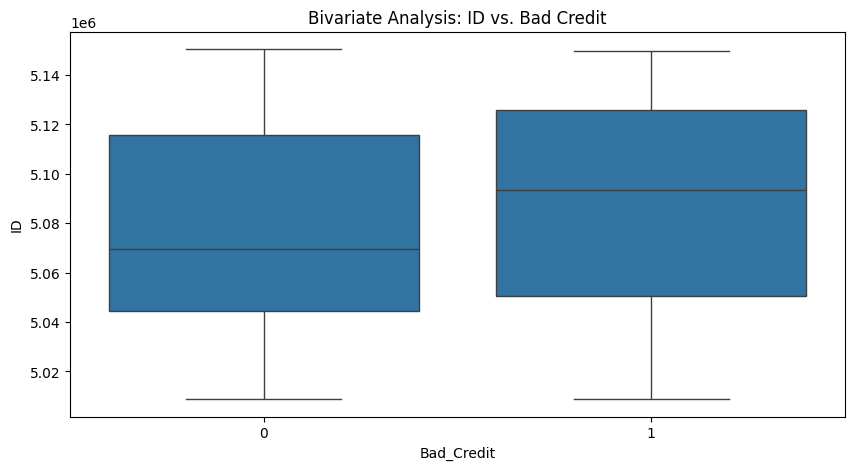

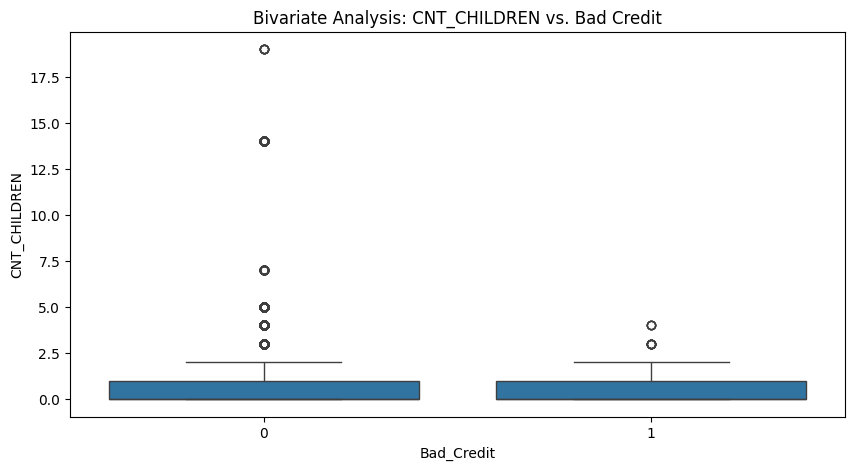

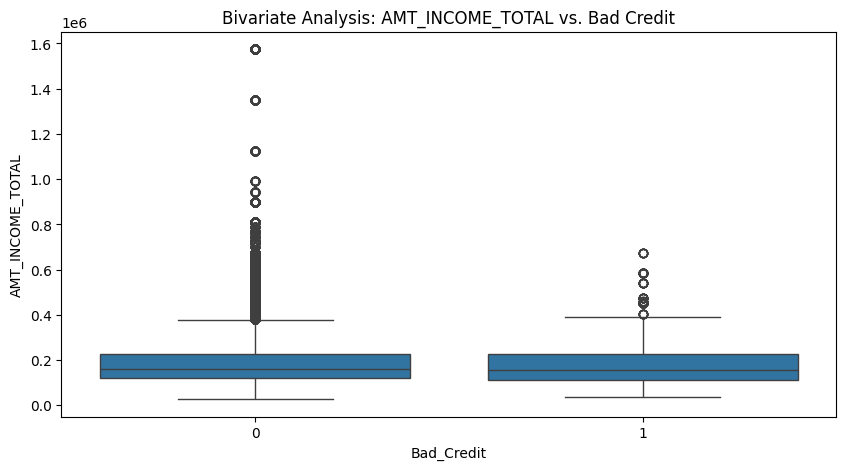

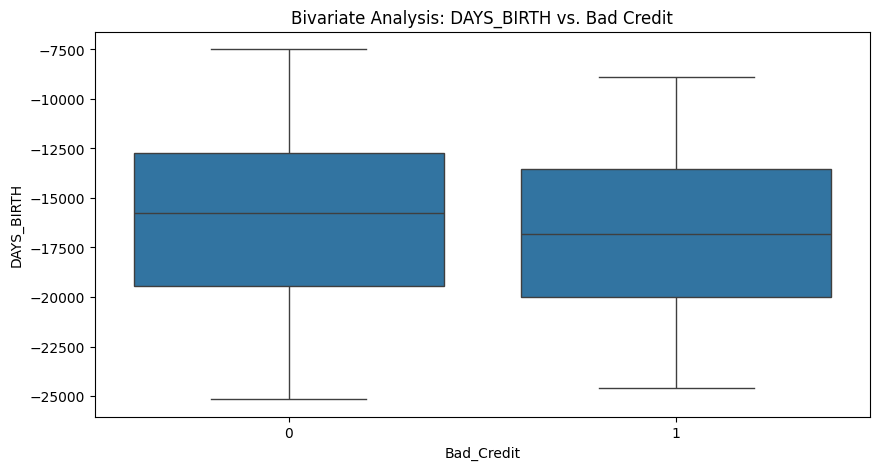

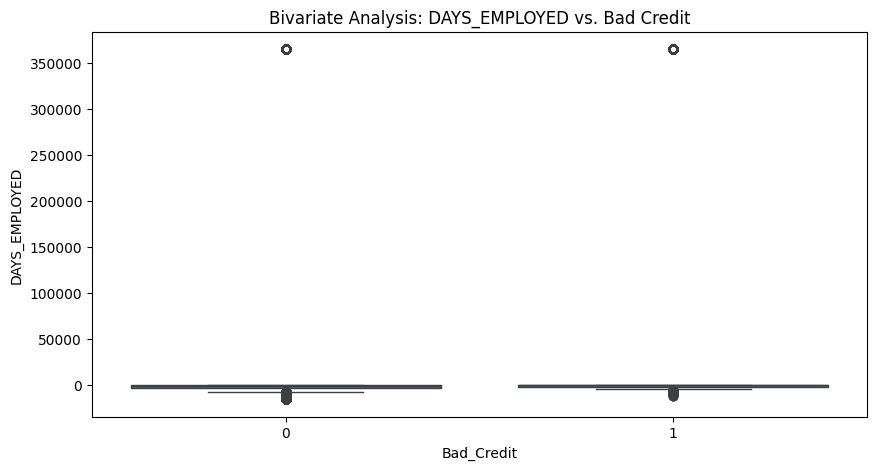

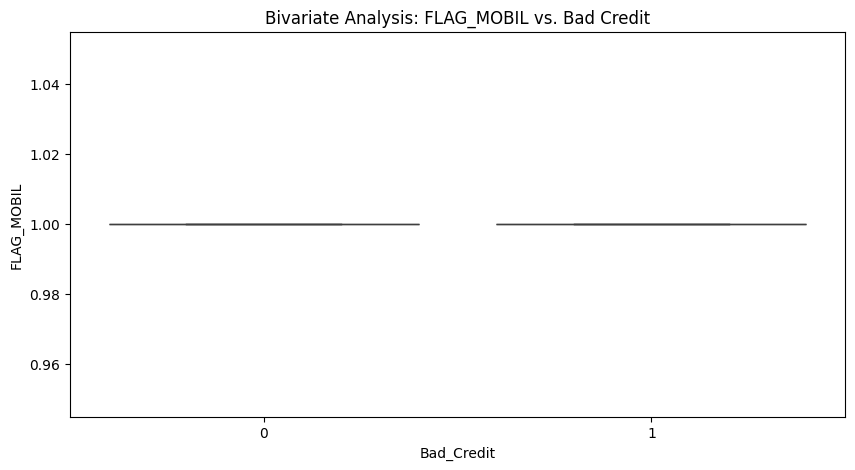

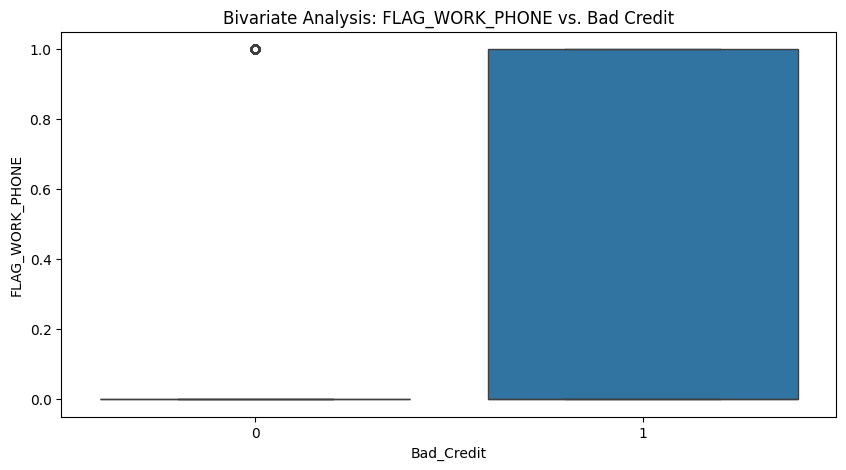

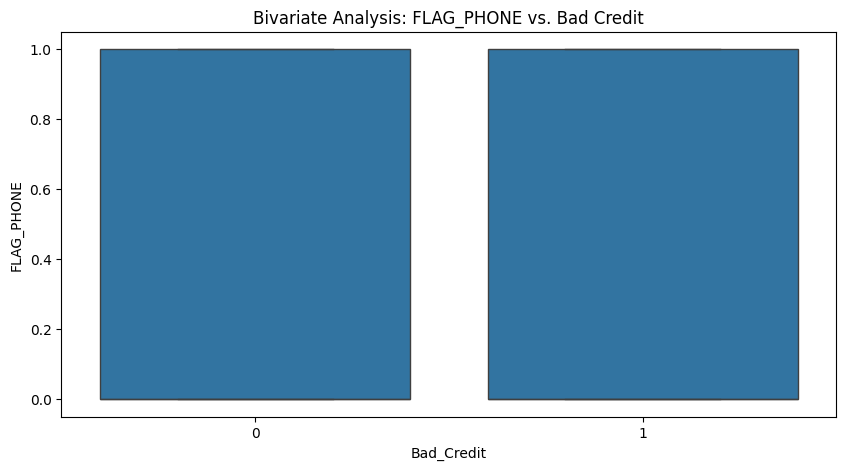

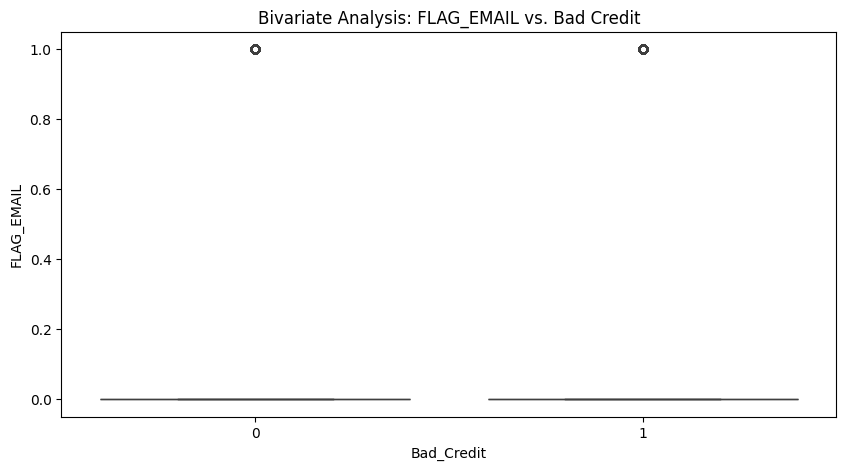

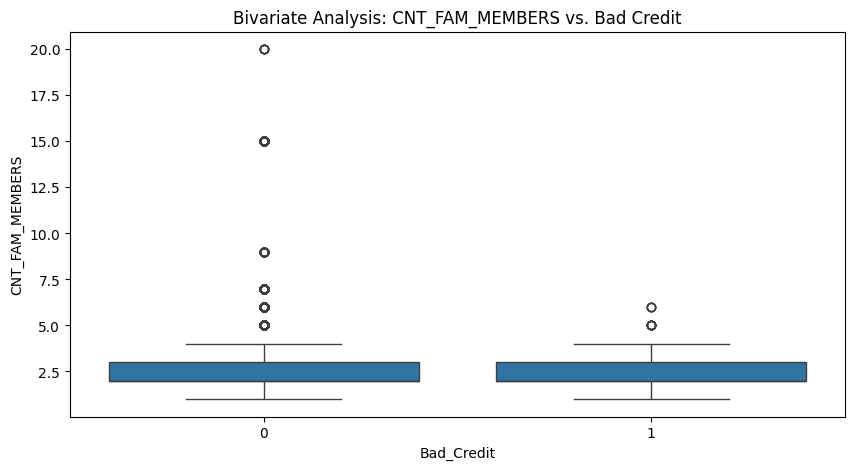

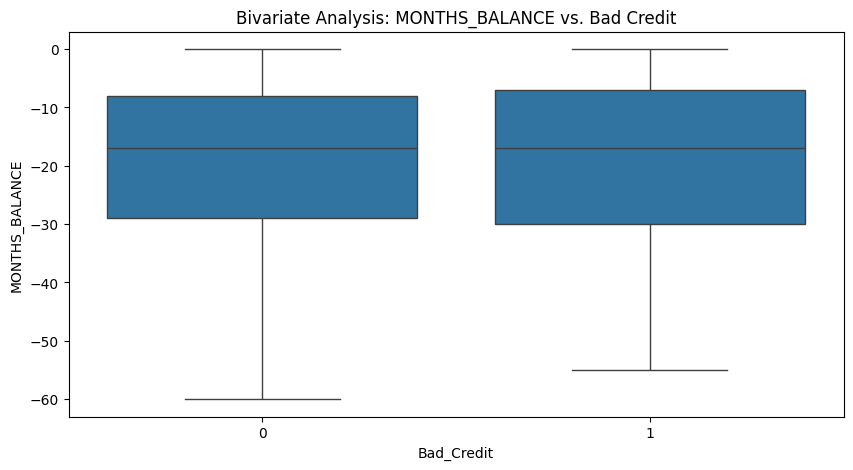

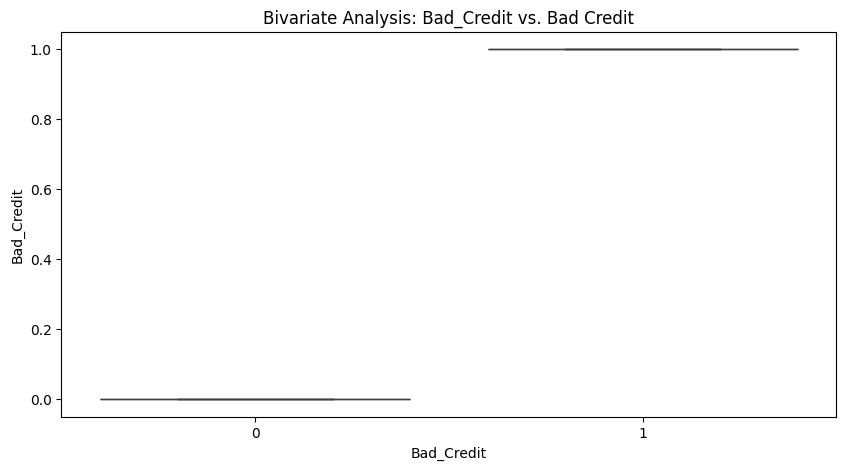

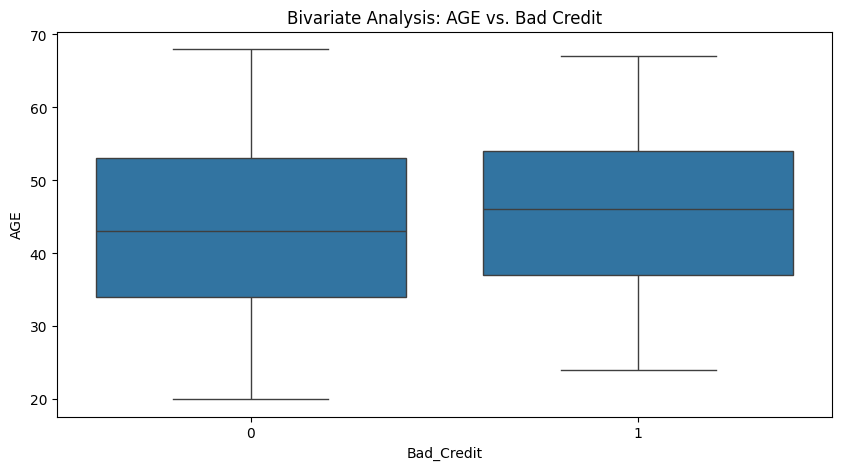

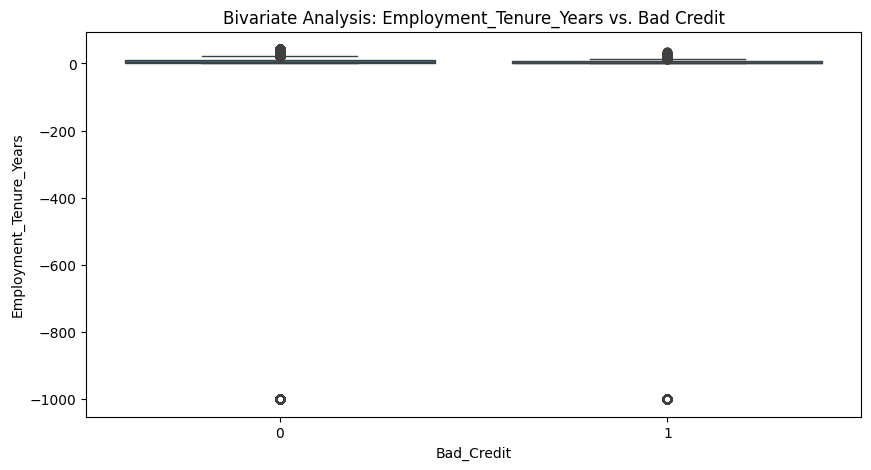

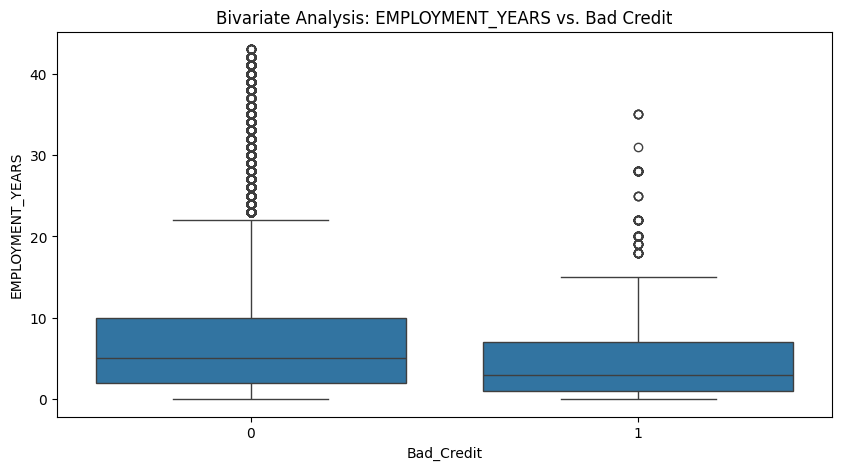

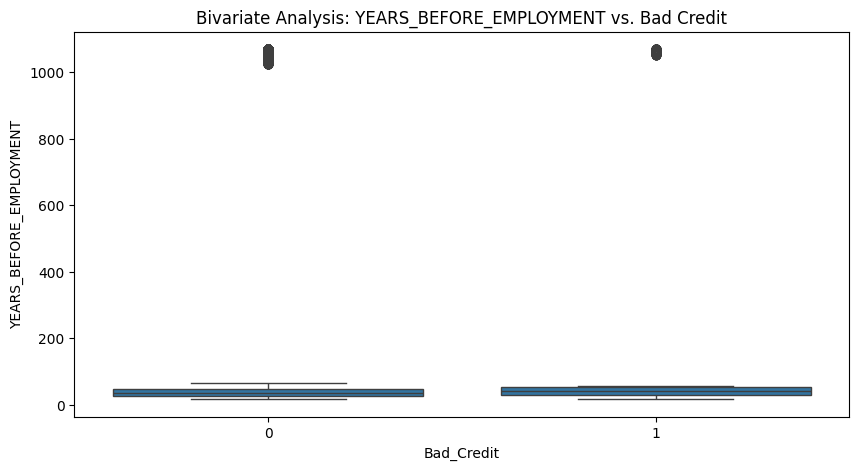

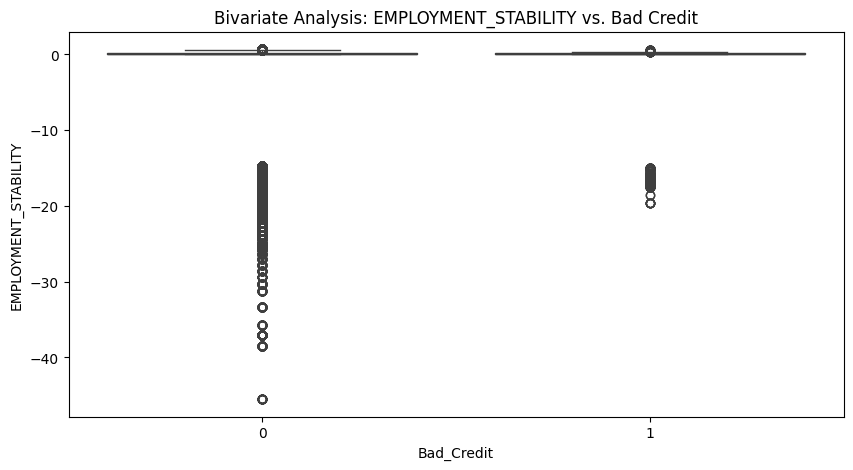

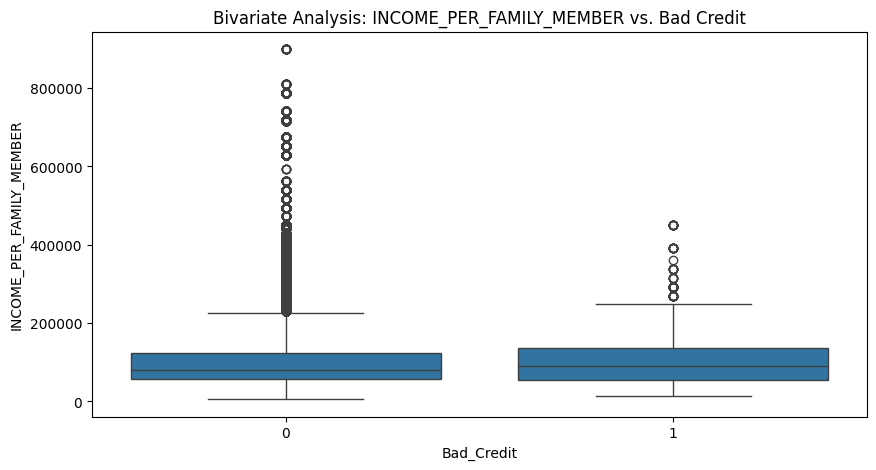

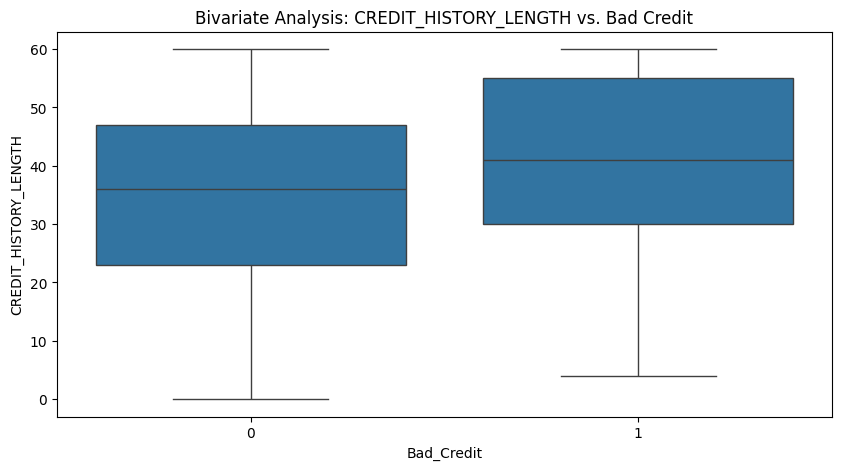

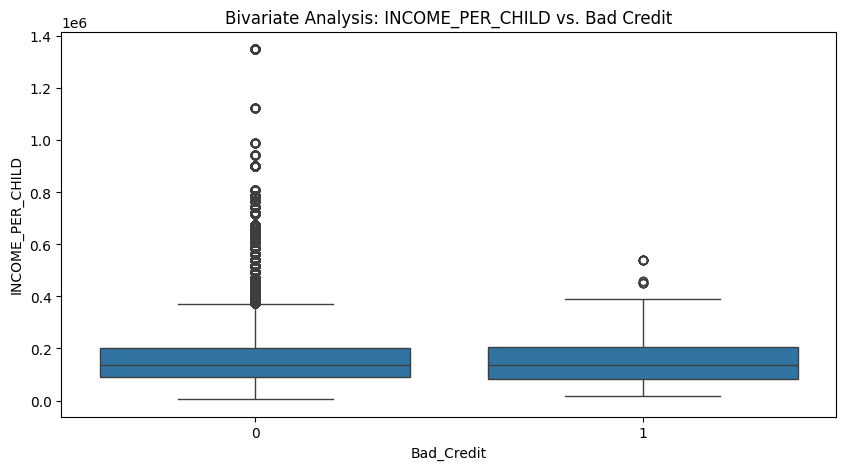

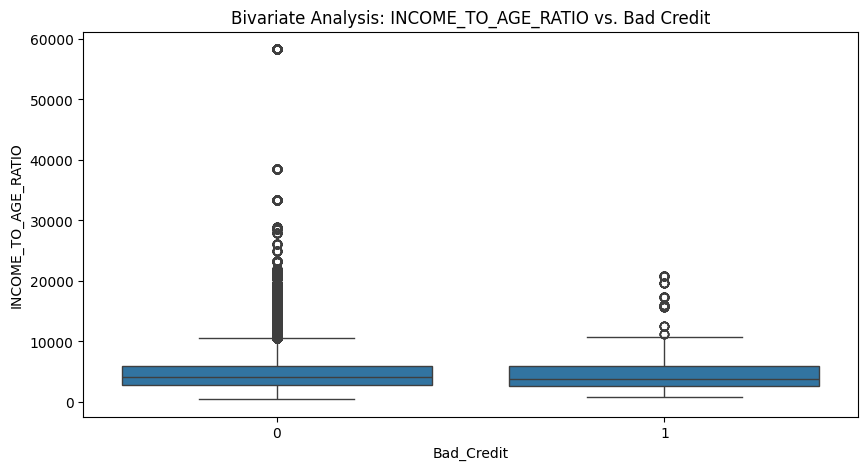

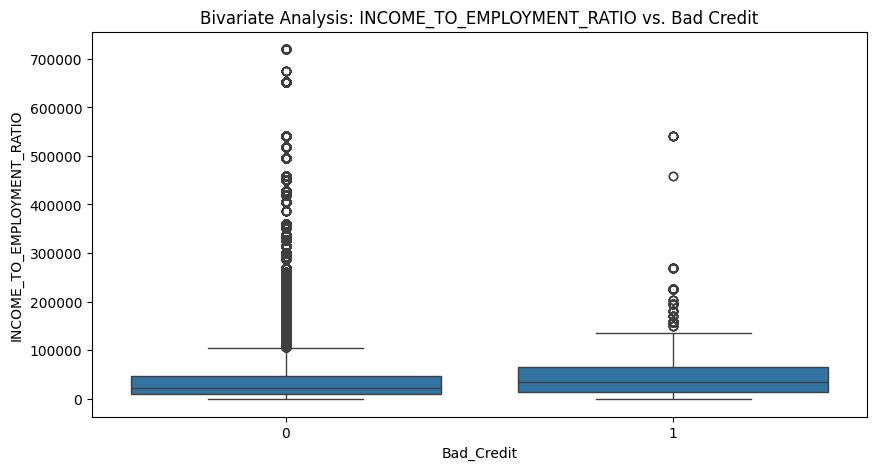

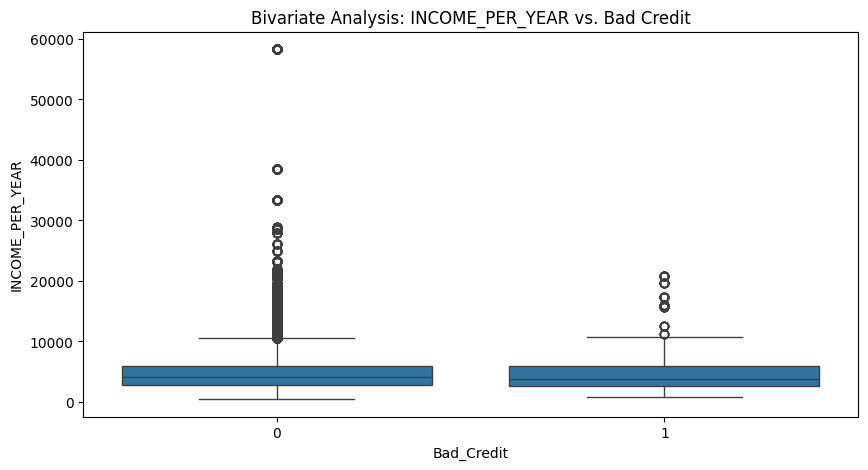

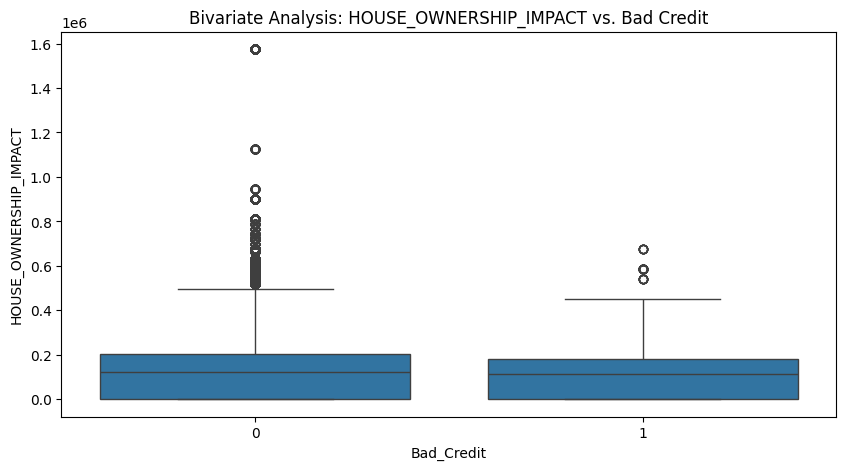

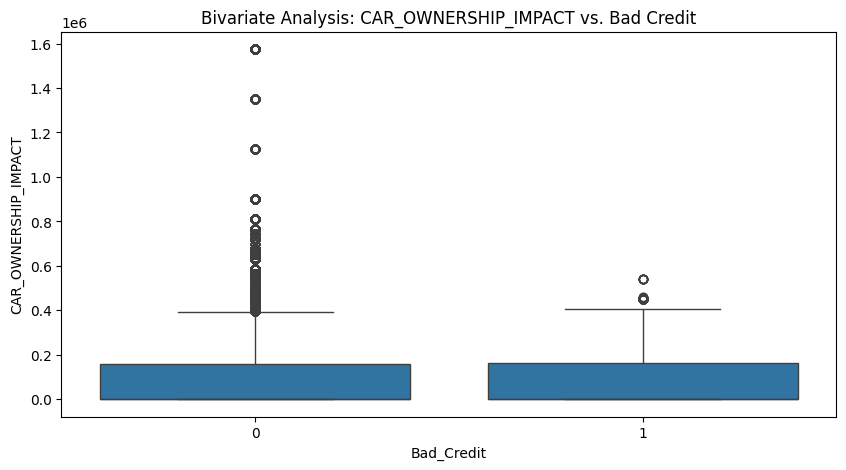

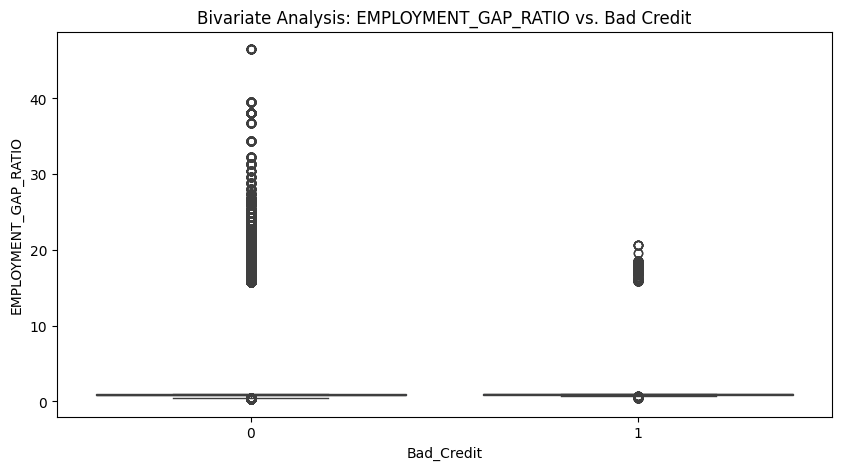

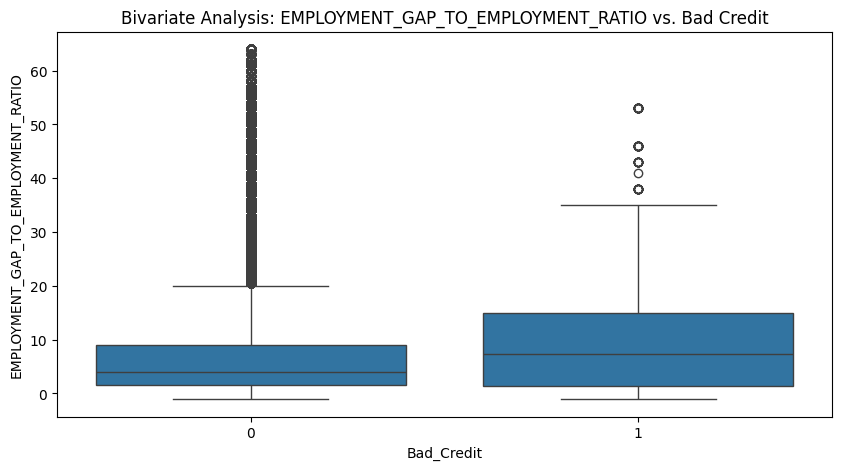

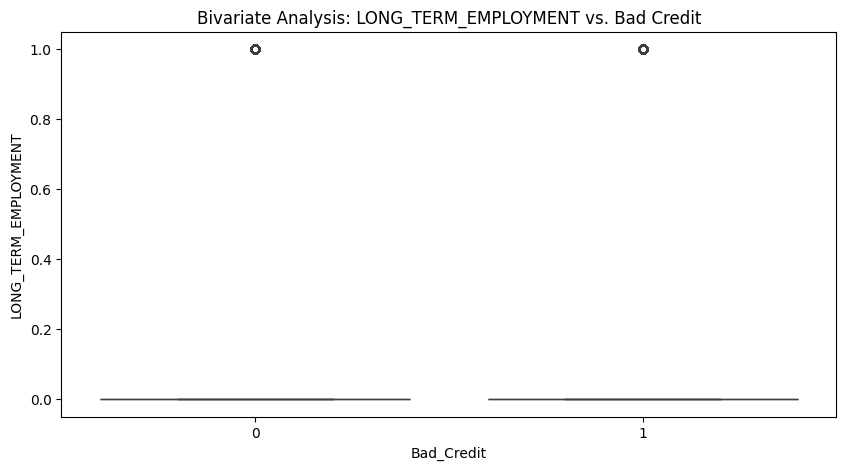

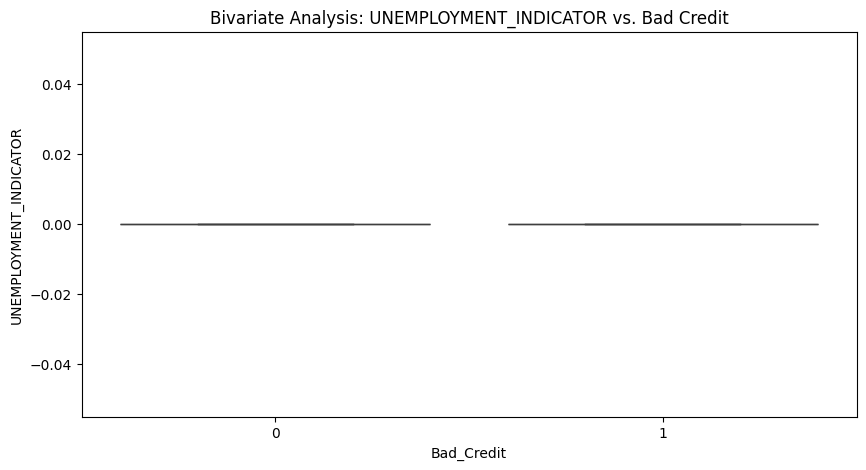

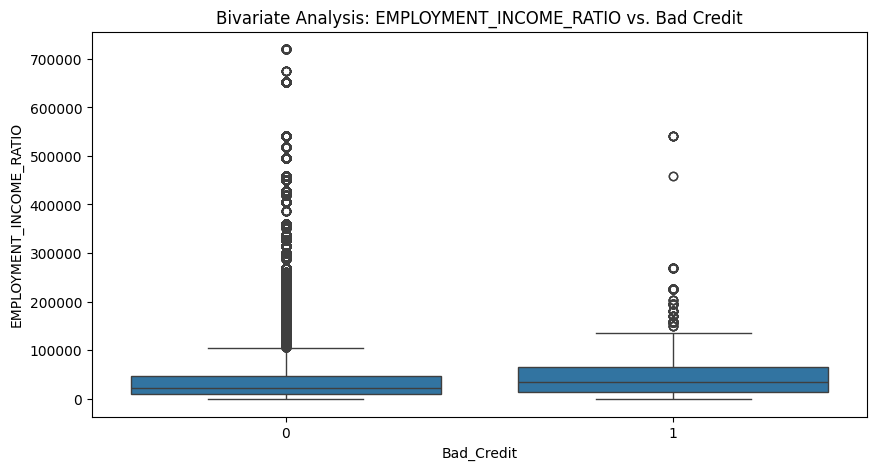

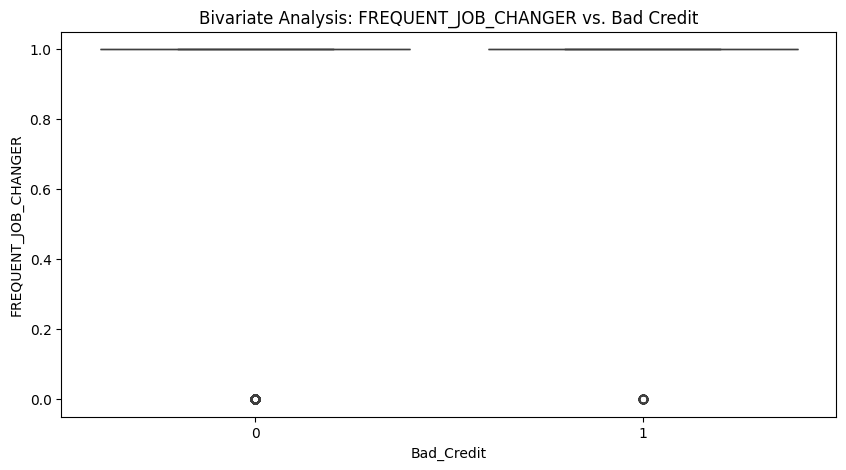

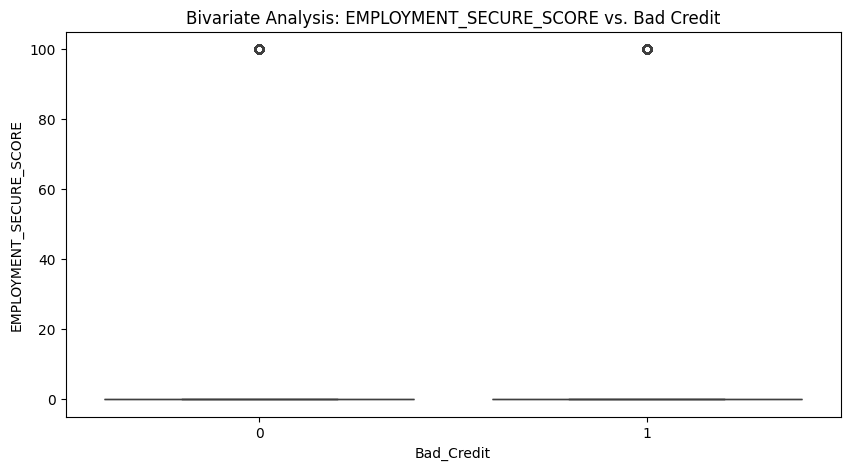

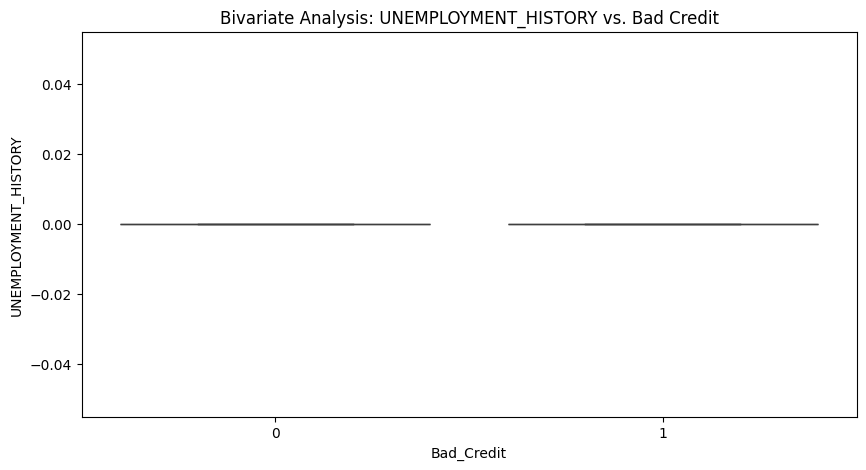

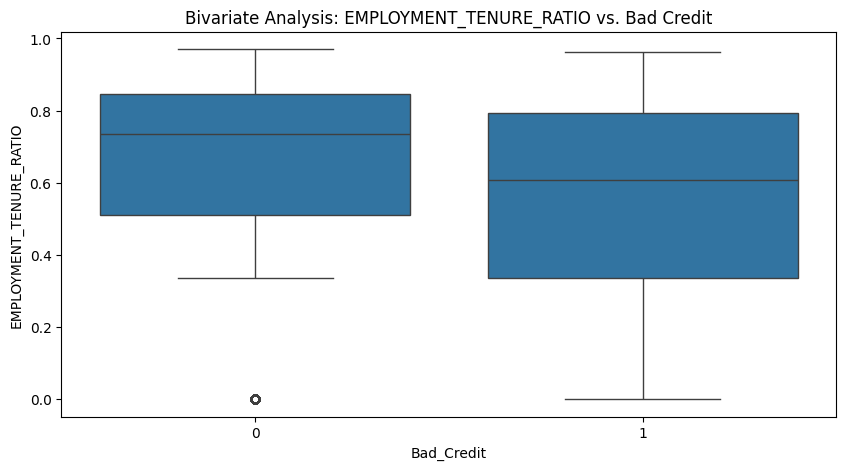

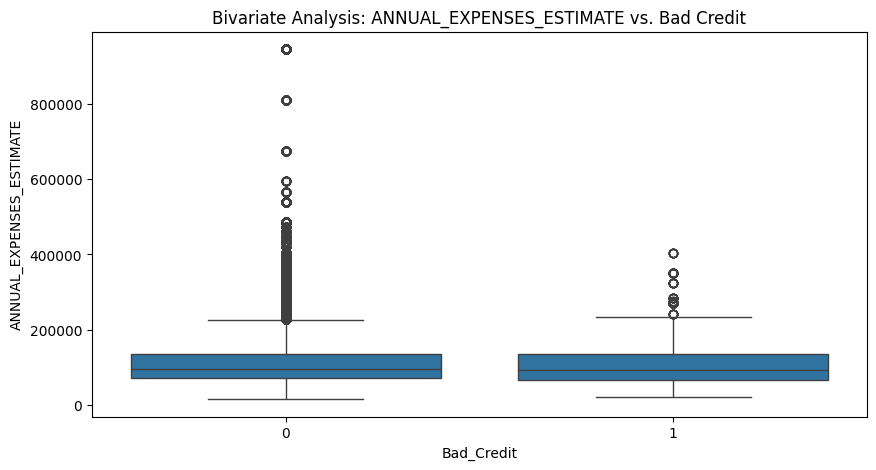

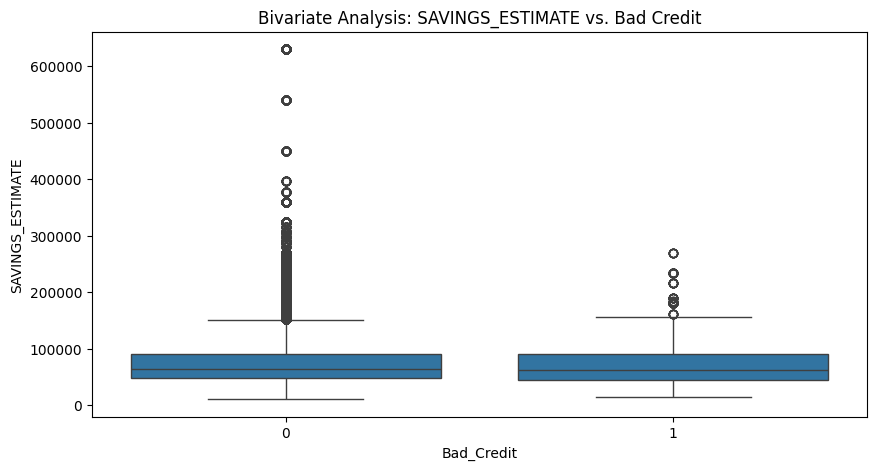

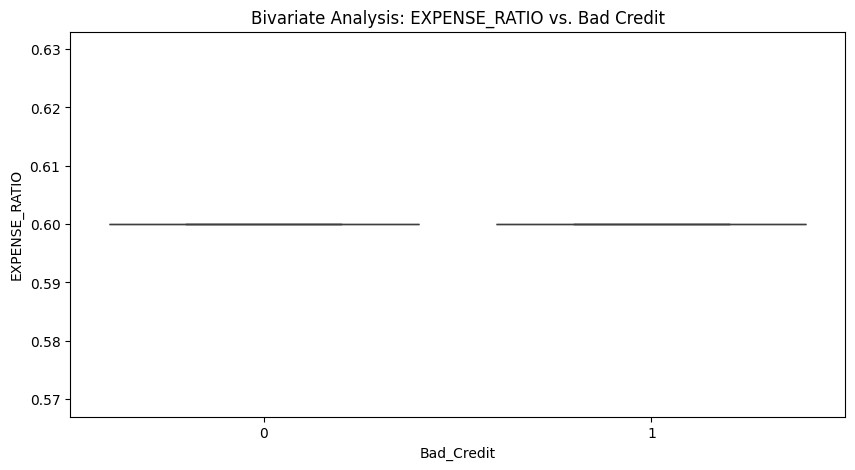

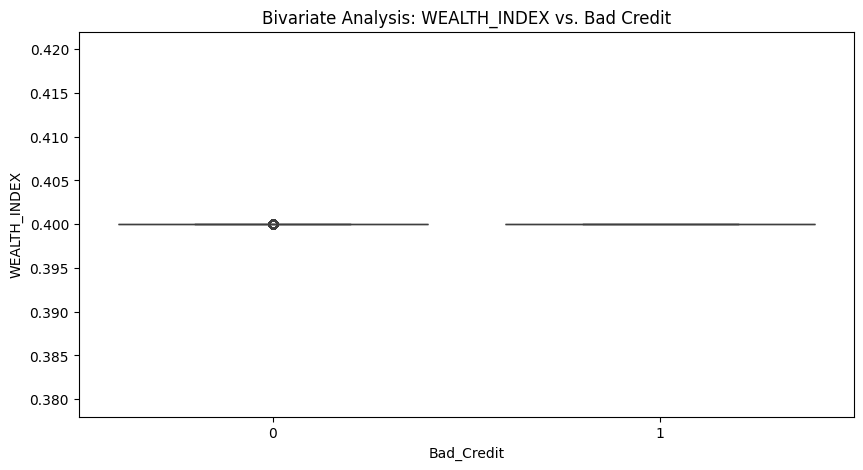

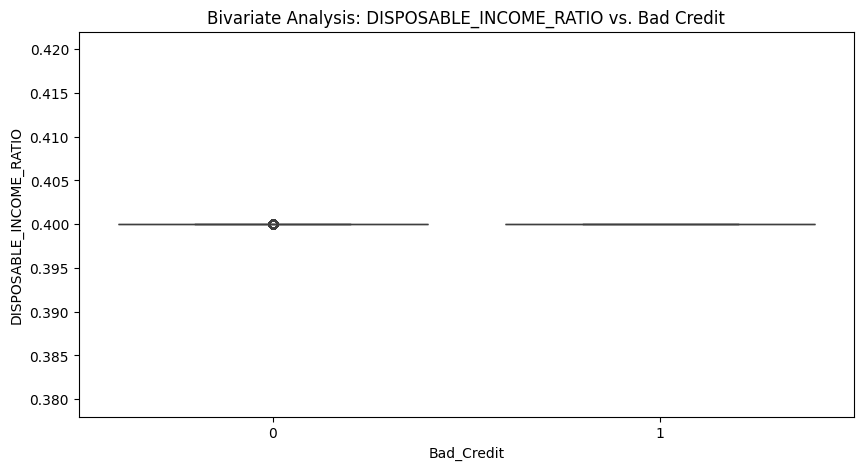

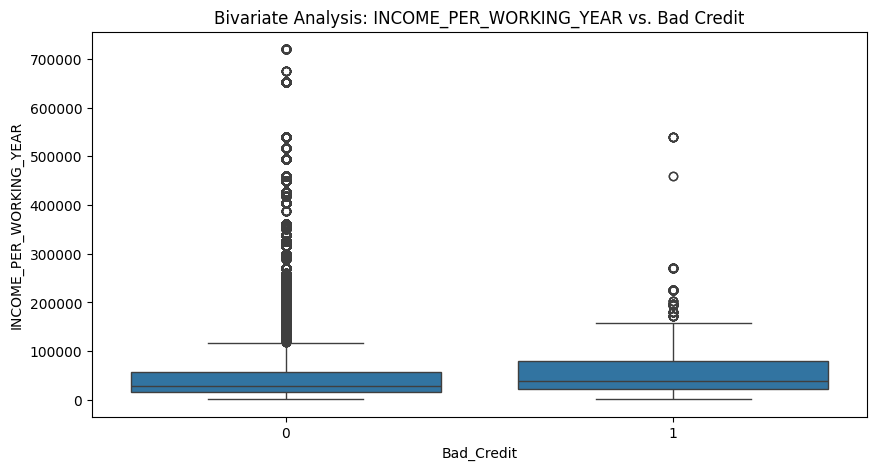

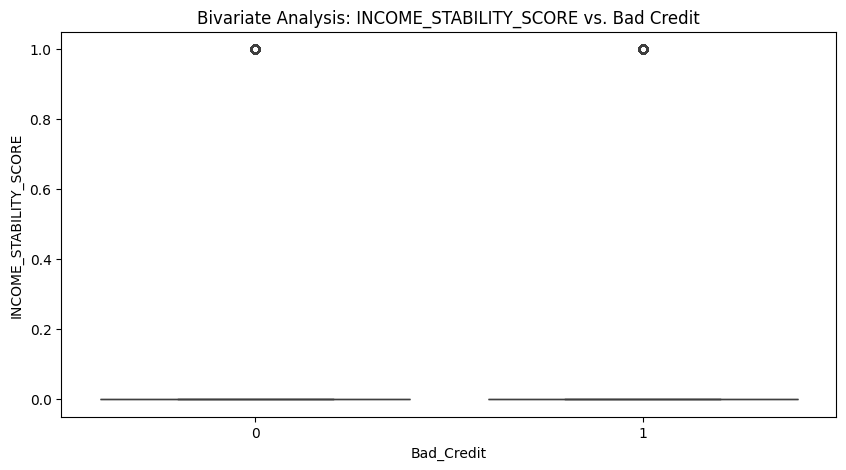

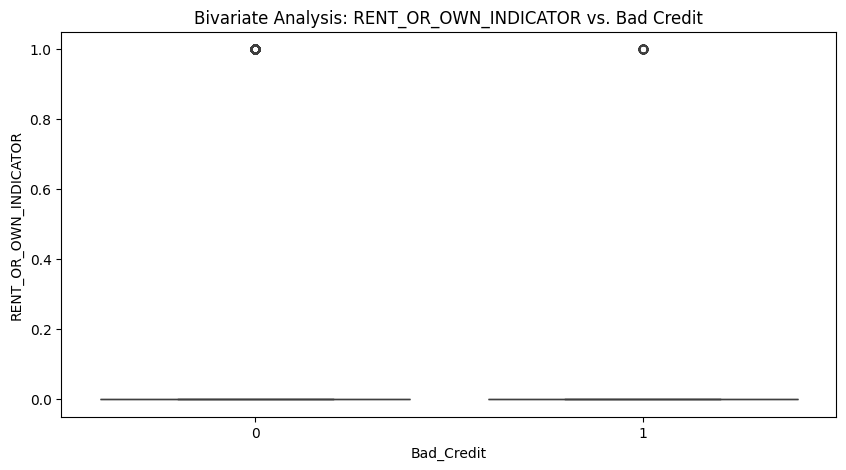

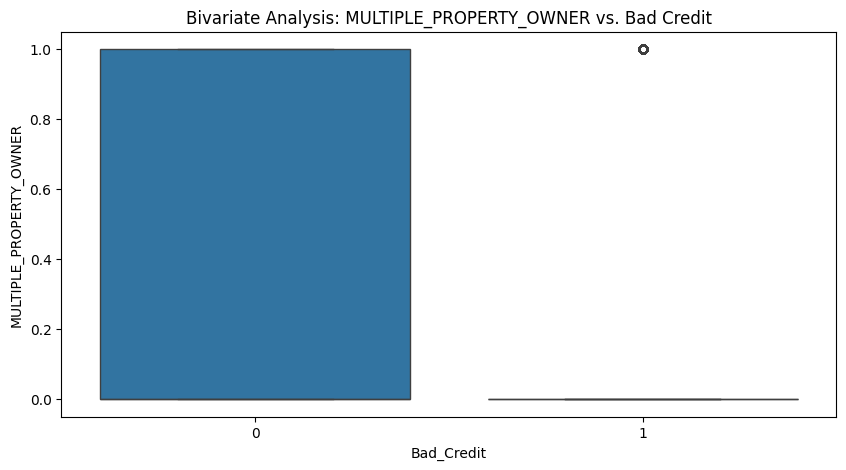

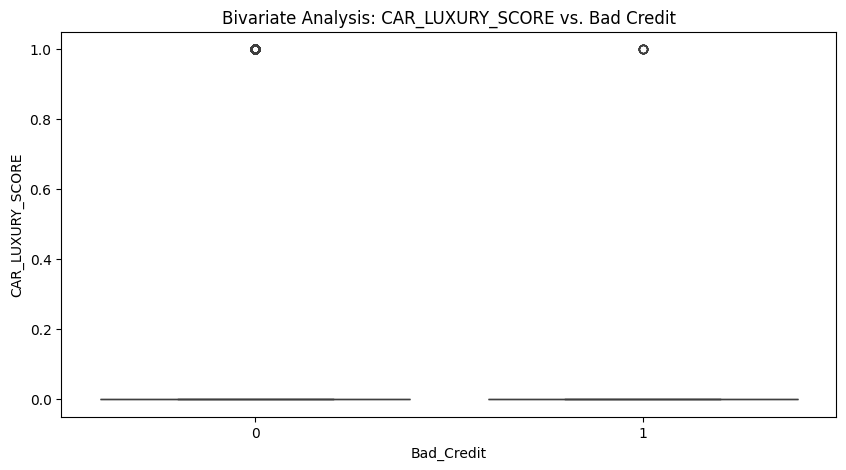

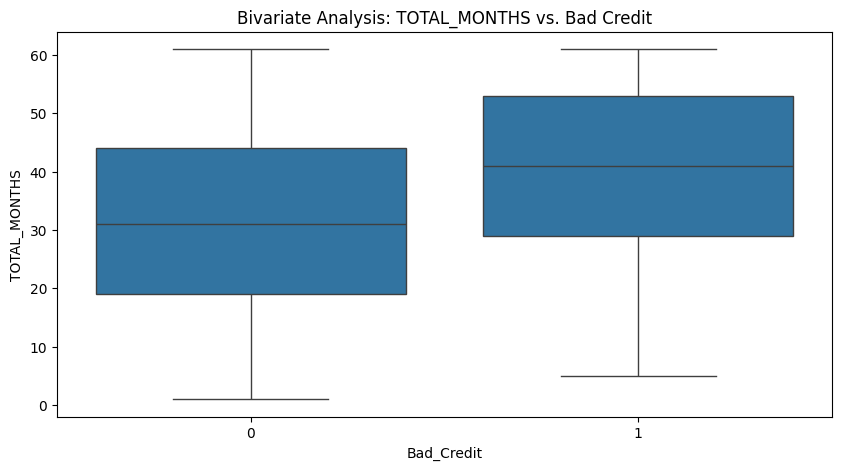

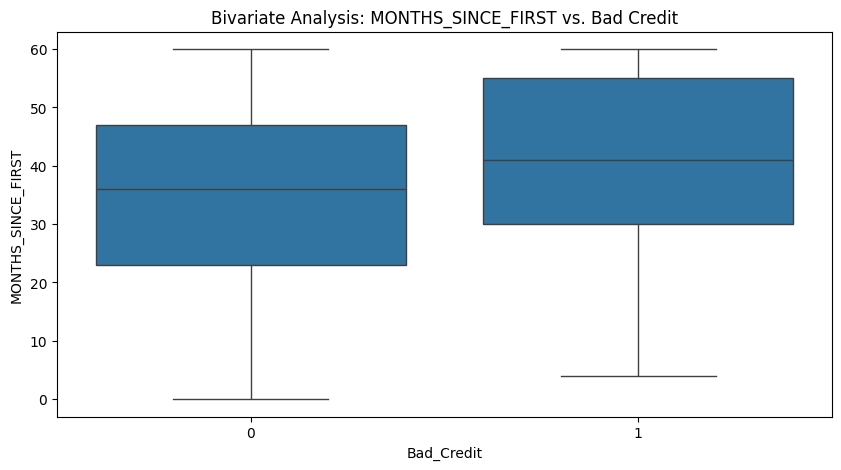

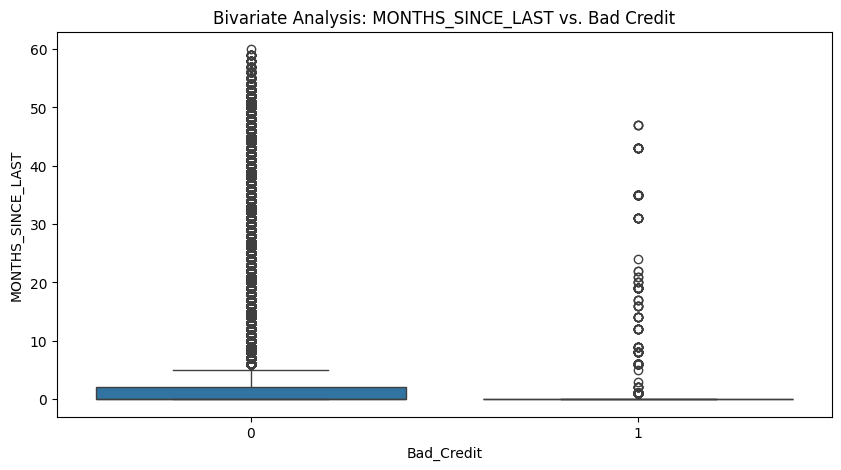

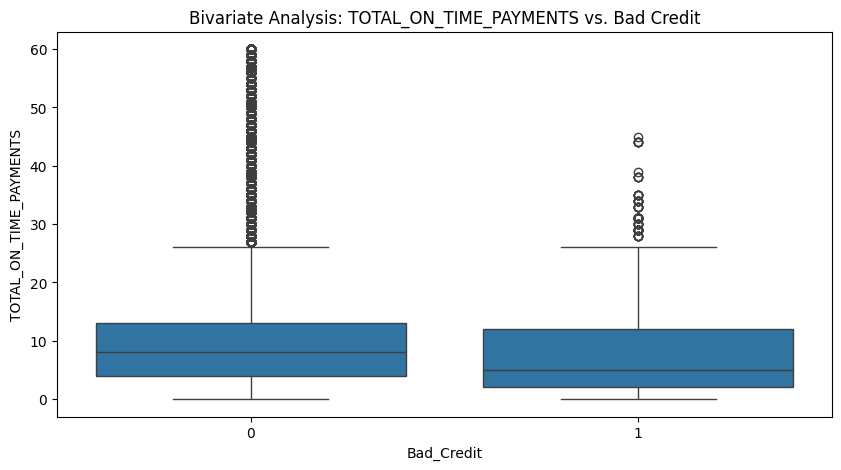

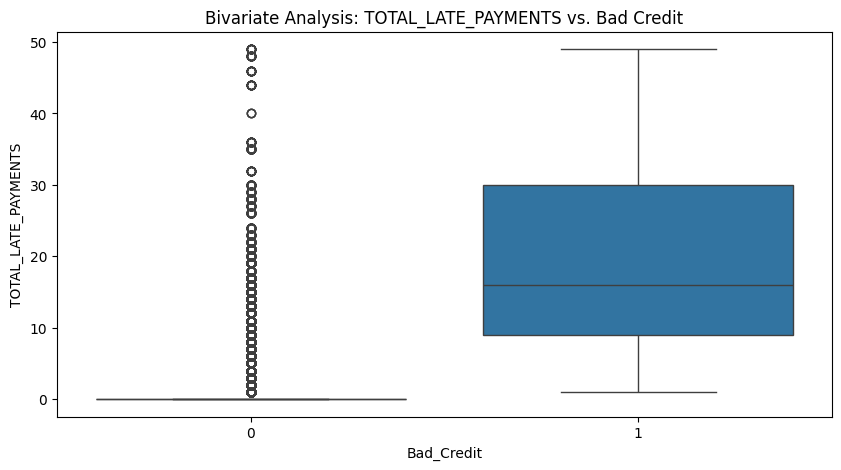

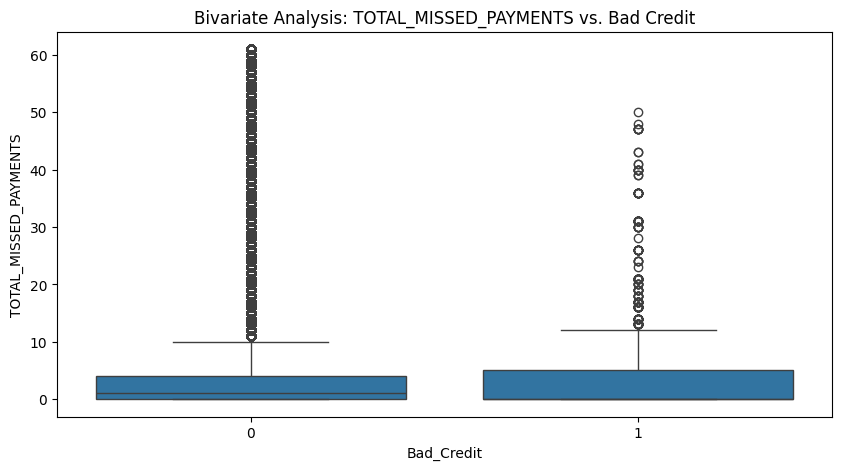

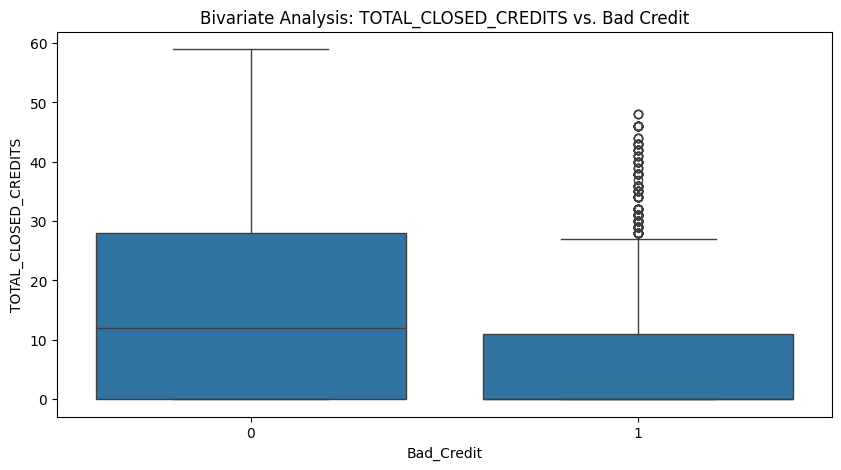

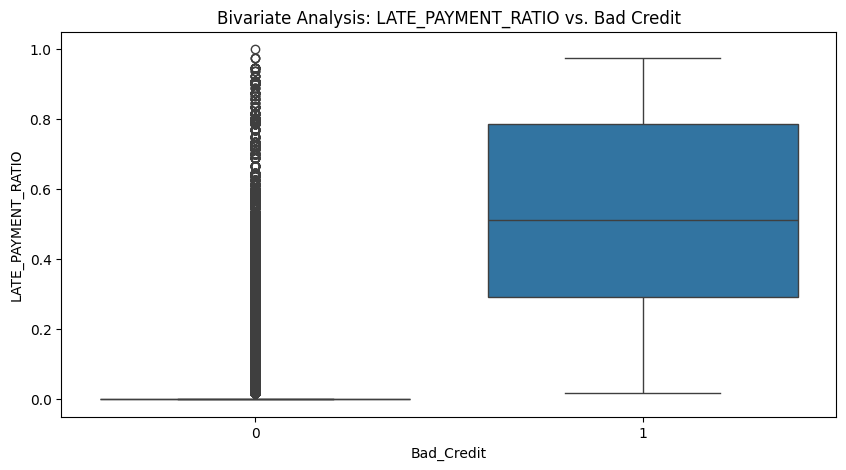

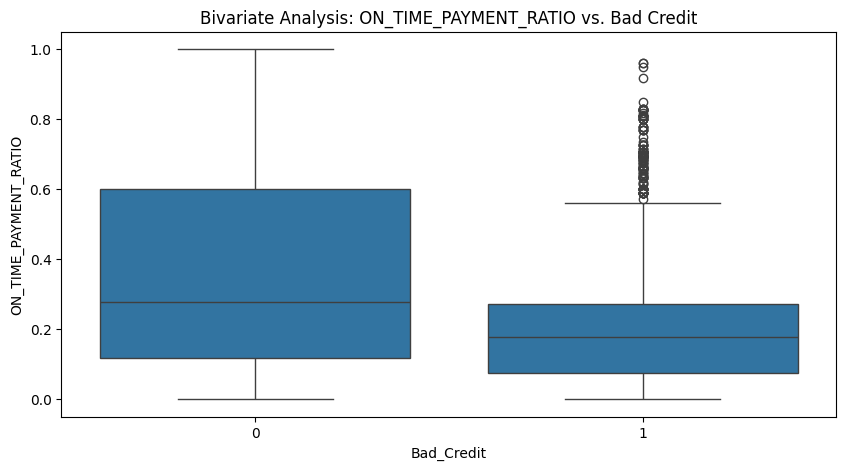

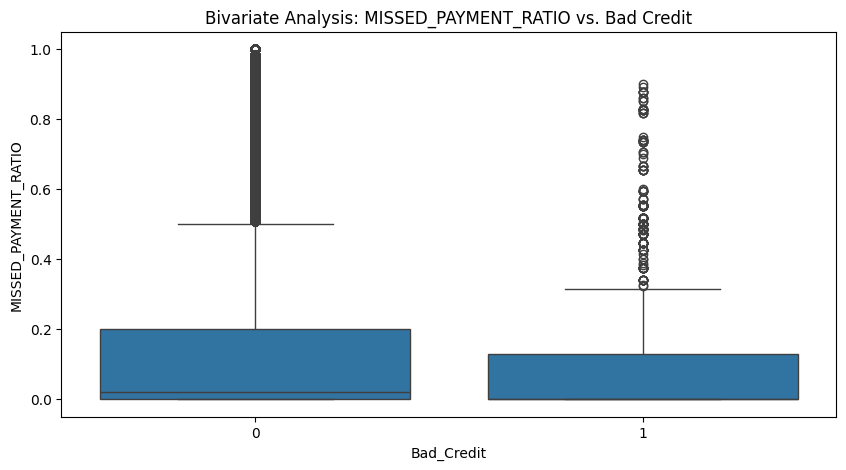

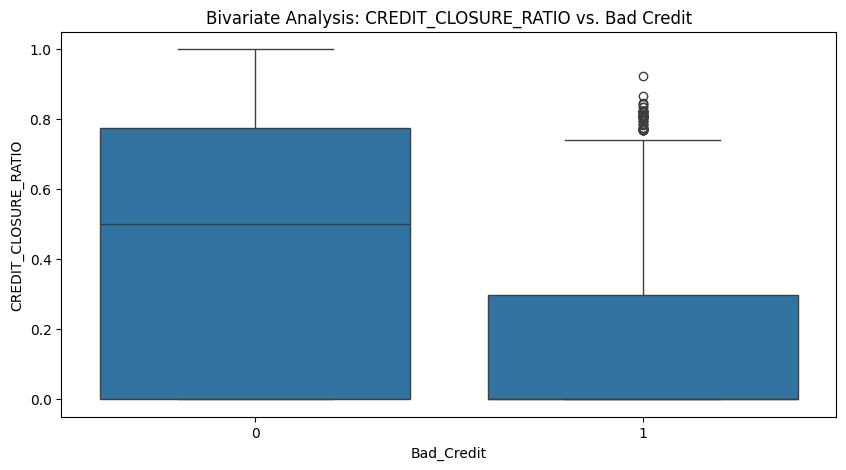

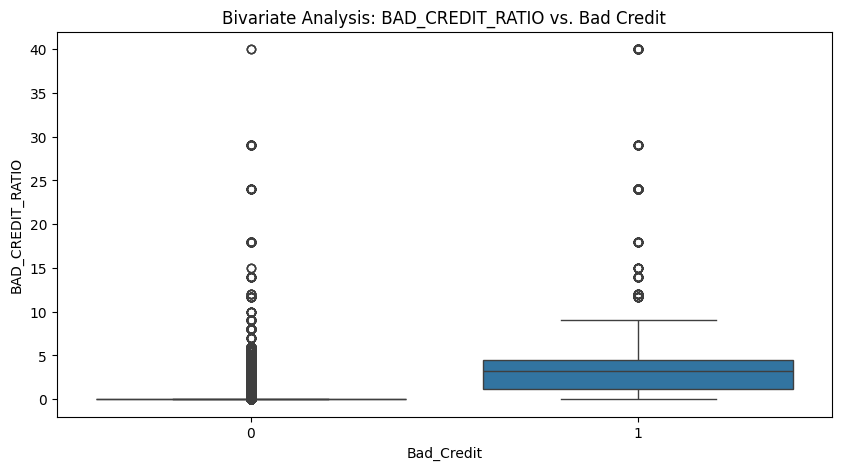

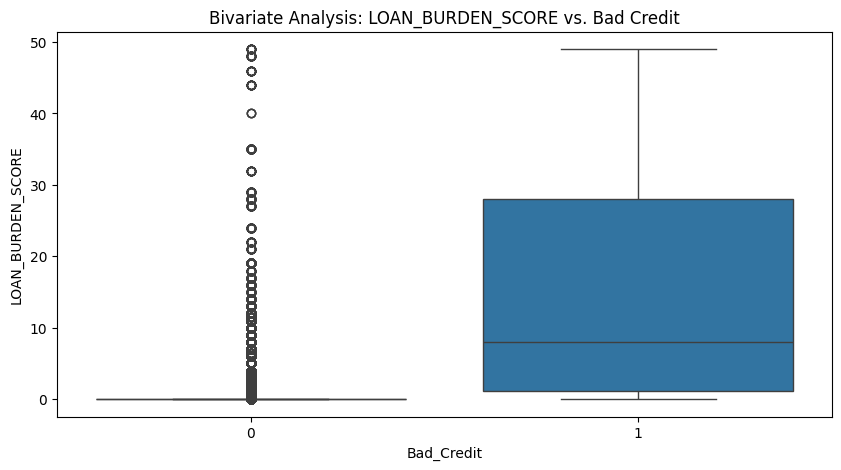

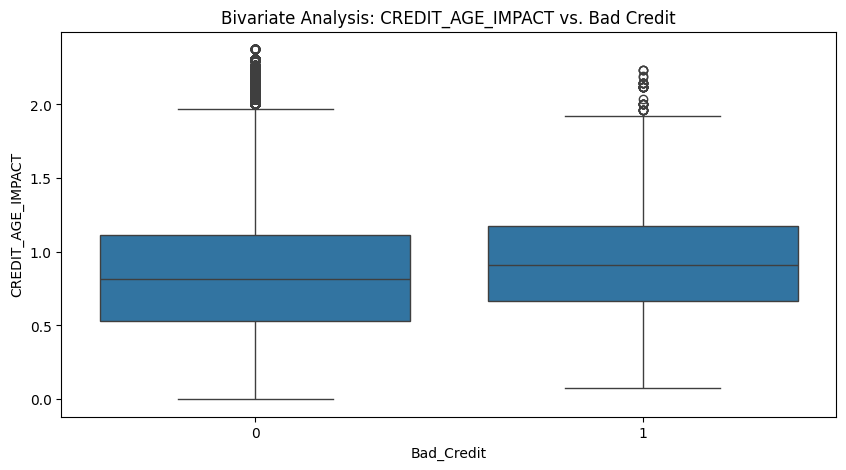

In [45]:
continuous_vars = ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'Bad_Credit', 'AGE',
       'Employment_Tenure_Years', 'EMPLOYMENT_YEARS',
       'YEARS_BEFORE_EMPLOYMENT', 'EMPLOYMENT_STABILITY',
       'INCOME_PER_FAMILY_MEMBER', 'CREDIT_HISTORY_LENGTH', 'INCOME_PER_CHILD',
       'INCOME_TO_AGE_RATIO', 'INCOME_TO_EMPLOYMENT_RATIO', 'INCOME_PER_YEAR',
       'HOUSE_OWNERSHIP_IMPACT', 'CAR_OWNERSHIP_IMPACT',
       'EMPLOYMENT_GAP_RATIO', 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO',
       'LONG_TERM_EMPLOYMENT', 'UNEMPLOYMENT_INDICATOR',
       'EMPLOYMENT_INCOME_RATIO', 'FREQUENT_JOB_CHANGER',
       'EMPLOYMENT_SECURE_SCORE', 'UNEMPLOYMENT_HISTORY',
       'EMPLOYMENT_TENURE_RATIO', 'ANNUAL_EXPENSES_ESTIMATE',
       'SAVINGS_ESTIMATE', 'EXPENSE_RATIO', 'WEALTH_INDEX',
       'DISPOSABLE_INCOME_RATIO', 'INCOME_PER_WORKING_YEAR',
       'INCOME_STABILITY_SCORE', 'RENT_OR_OWN_INDICATOR',
       'MULTIPLE_PROPERTY_OWNER', 'CAR_LUXURY_SCORE', 'TOTAL_MONTHS',
       'MONTHS_SINCE_FIRST', 'MONTHS_SINCE_LAST', 'TOTAL_ON_TIME_PAYMENTS',
       'TOTAL_LATE_PAYMENTS', 'TOTAL_MISSED_PAYMENTS', 'TOTAL_CLOSED_CREDITS',
       'LATE_PAYMENT_RATIO', 'ON_TIME_PAYMENT_RATIO', 'MISSED_PAYMENT_RATIO',
       'CREDIT_CLOSURE_RATIO', 'BAD_CREDIT_RATIO', 'LOAN_BURDEN_SCORE',
       'CREDIT_AGE_IMPACT']

# Bivariate analysis for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=merged_df['Bad_Credit'], y=merged_df[var])
    plt.title(f"Bivariate Analysis: {var} vs. Bad Credit")
    plt.show()

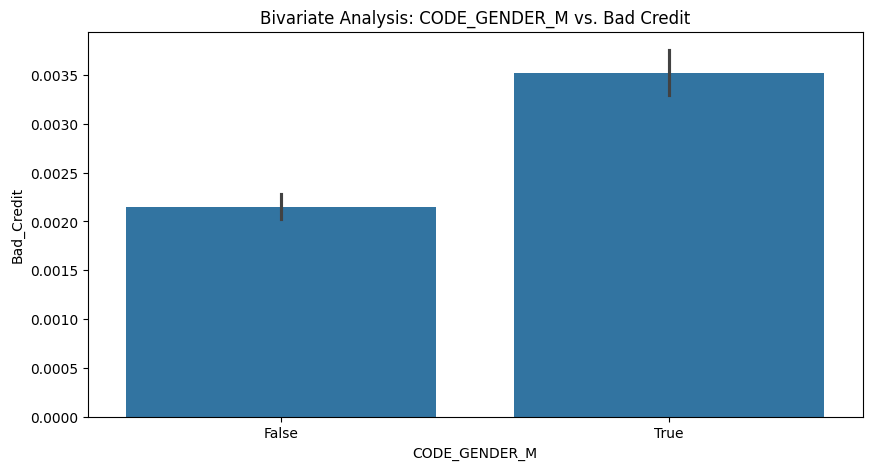

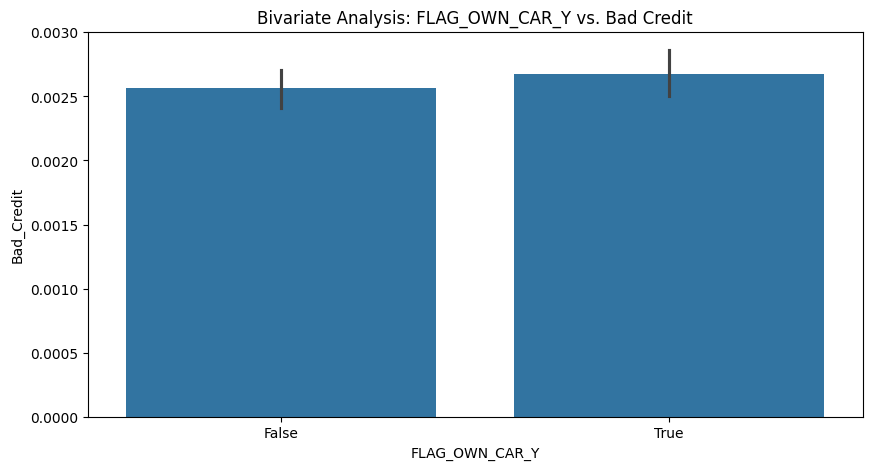

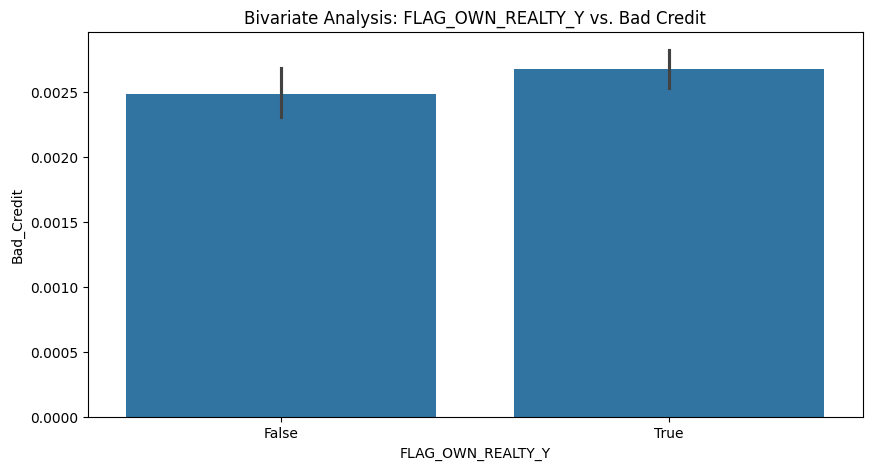

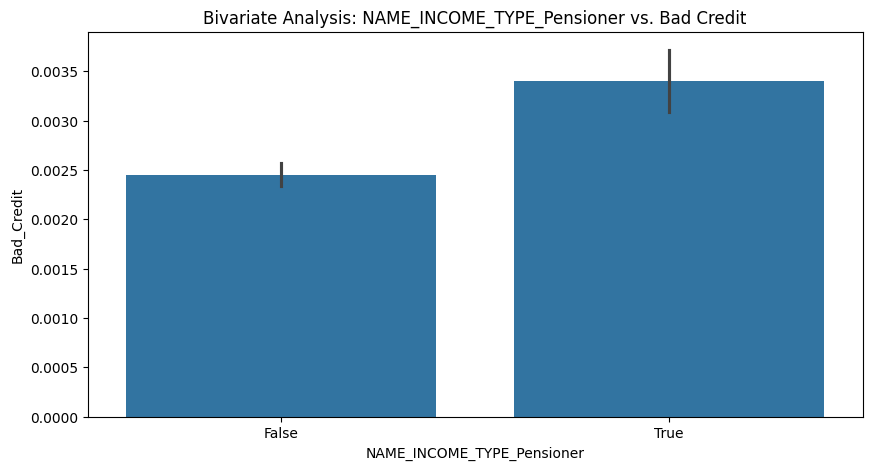

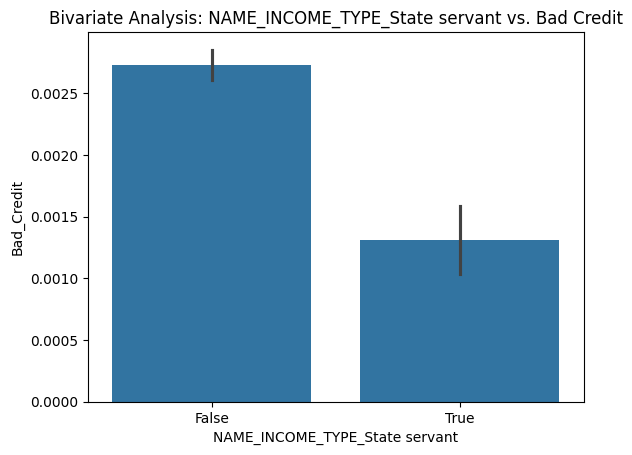

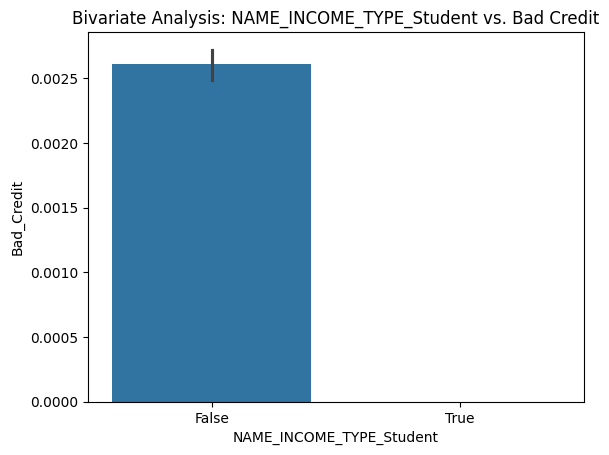

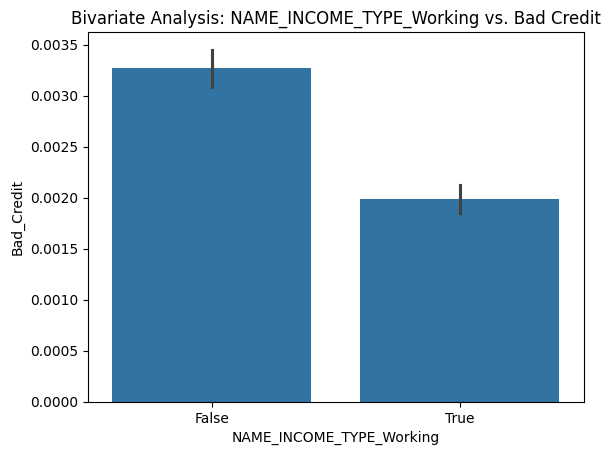

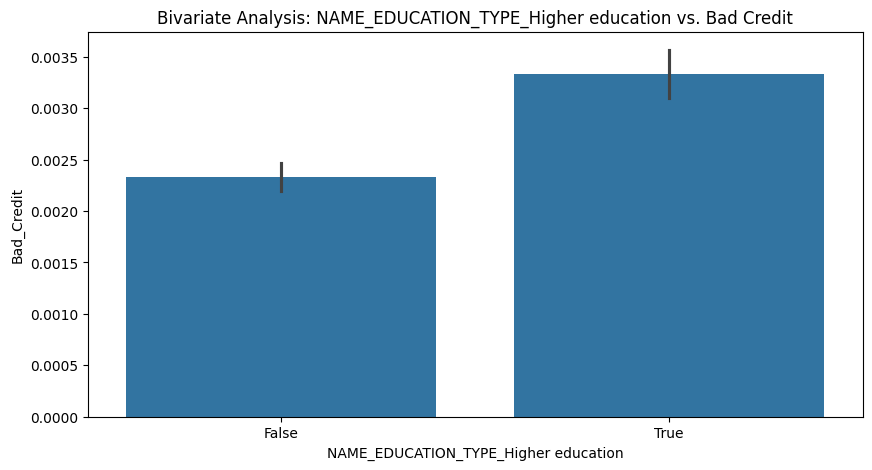

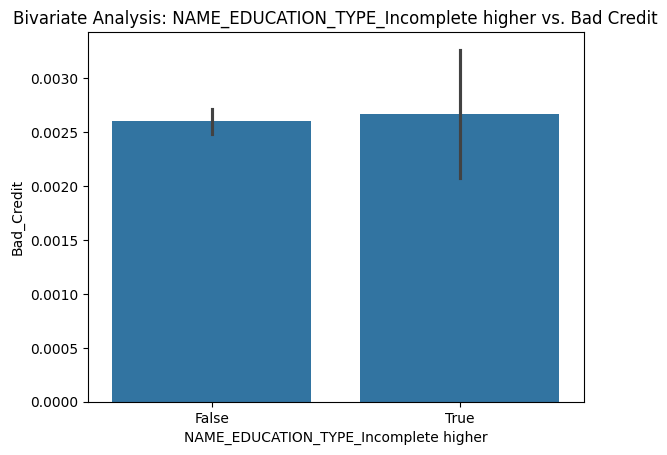

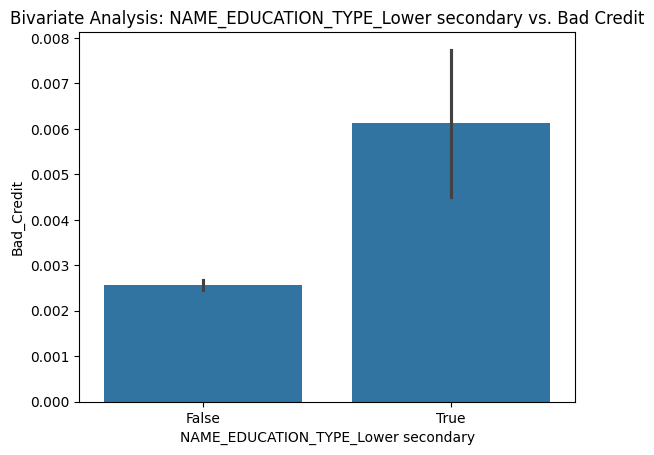

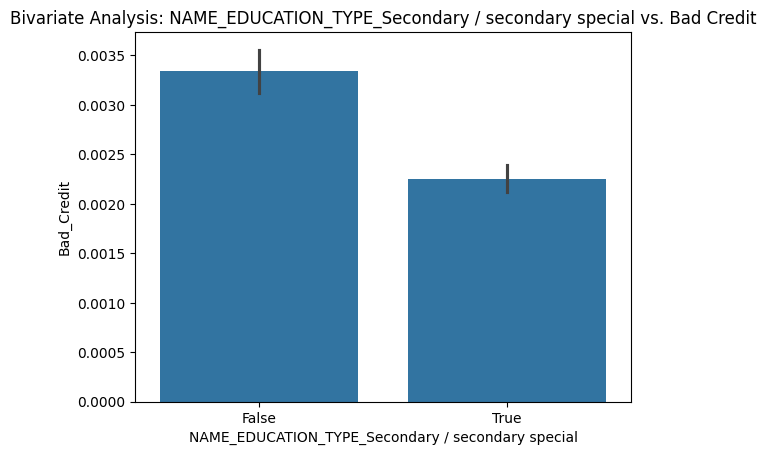

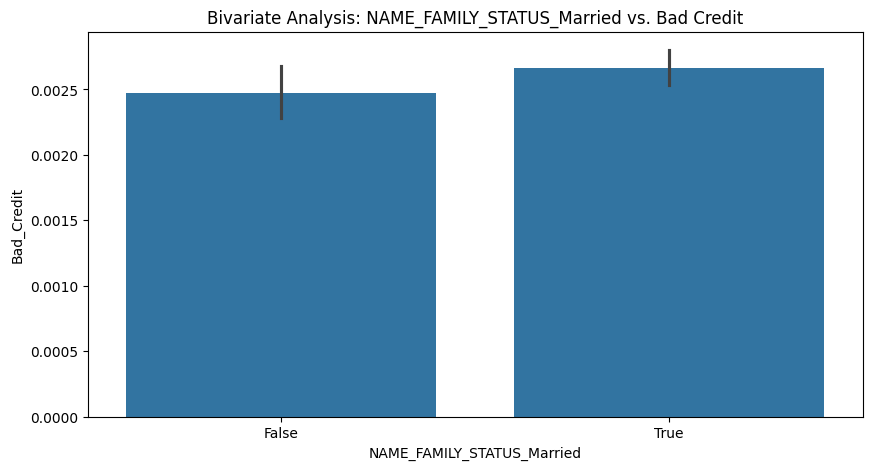

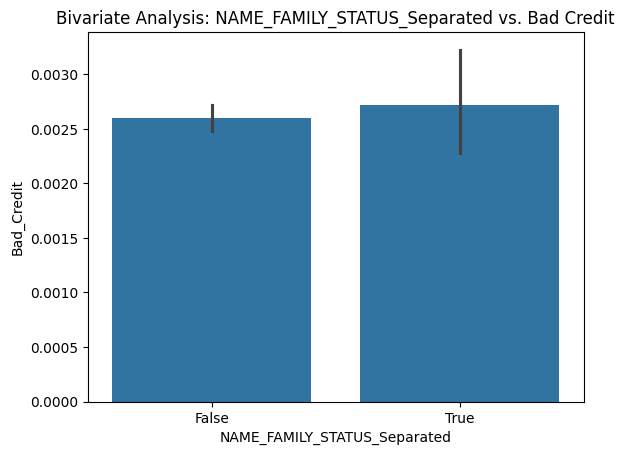

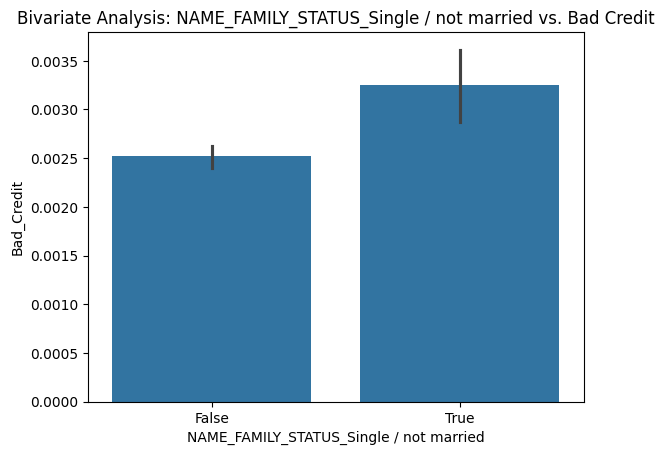

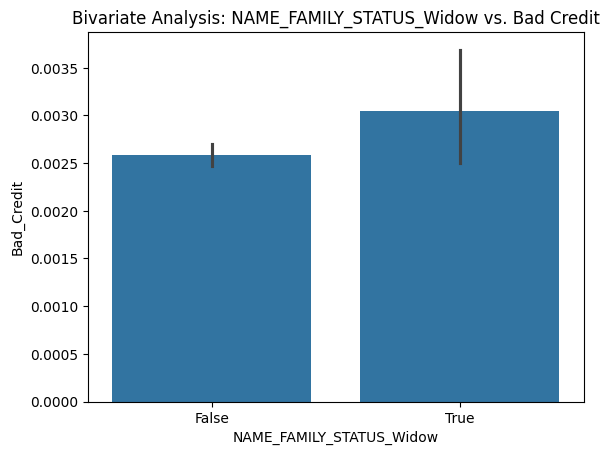

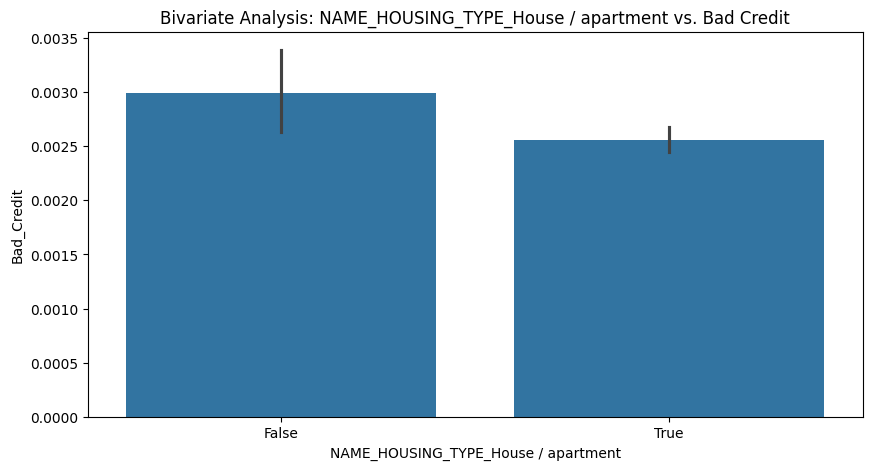

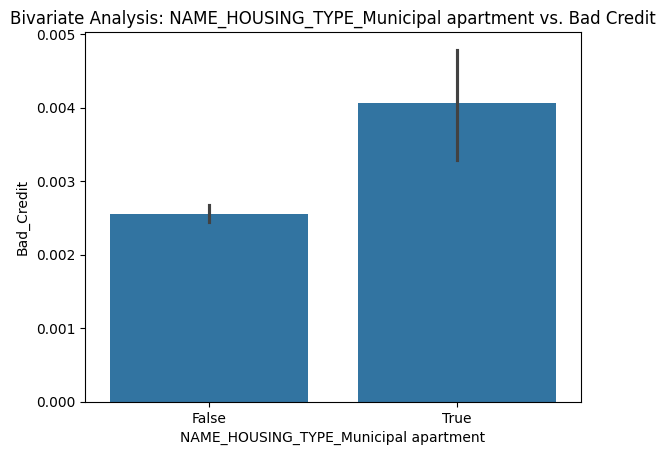

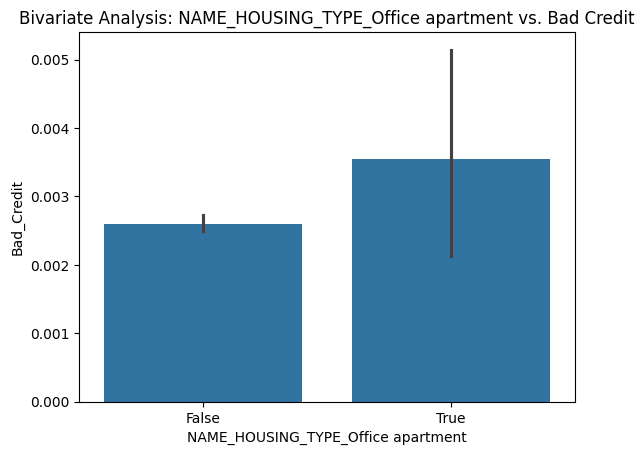

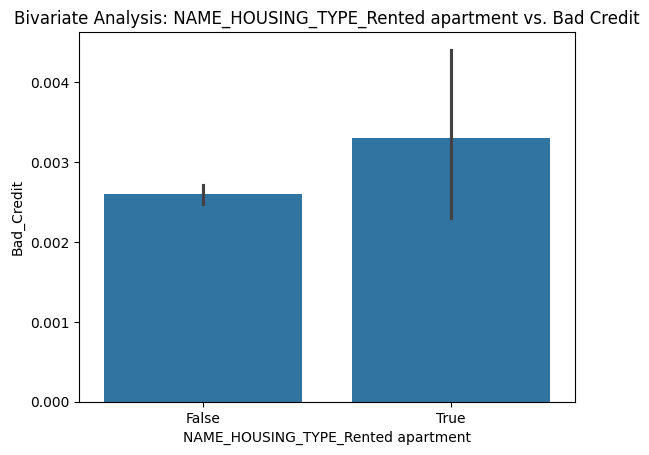

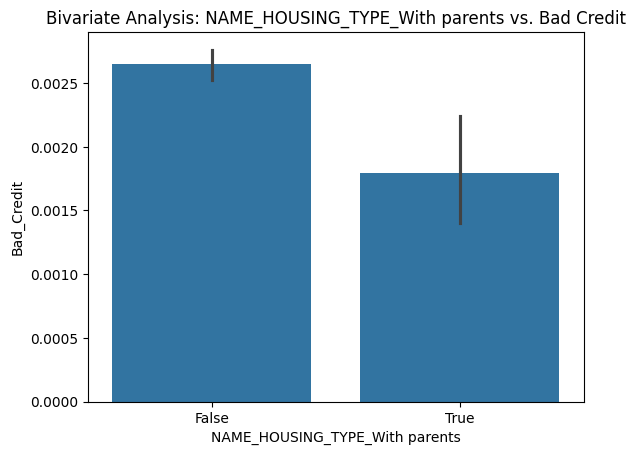

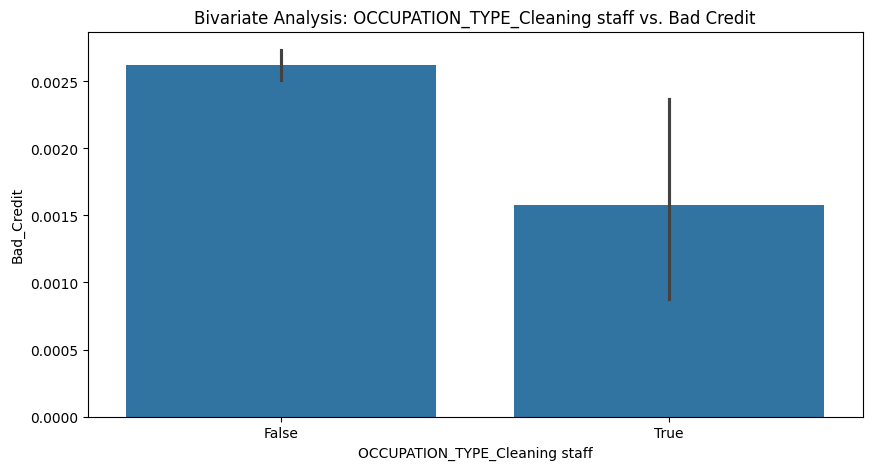

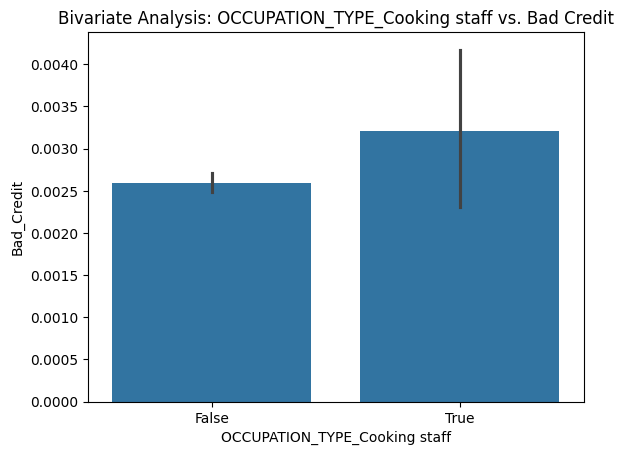

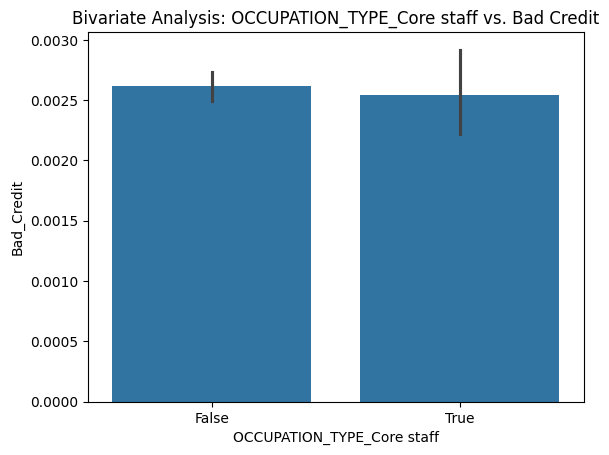

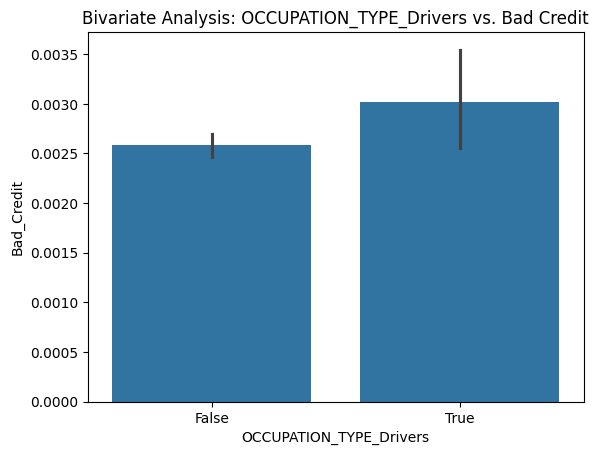

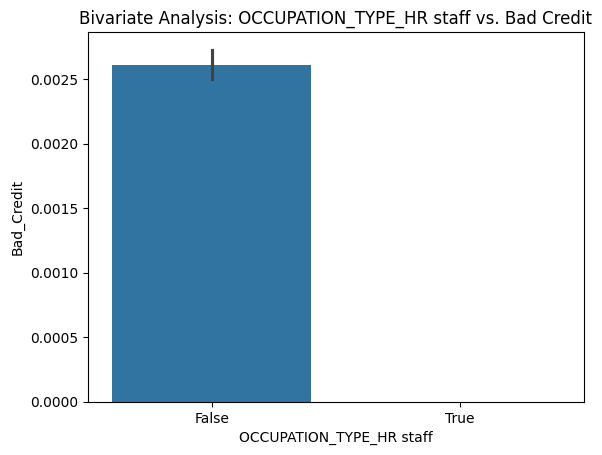

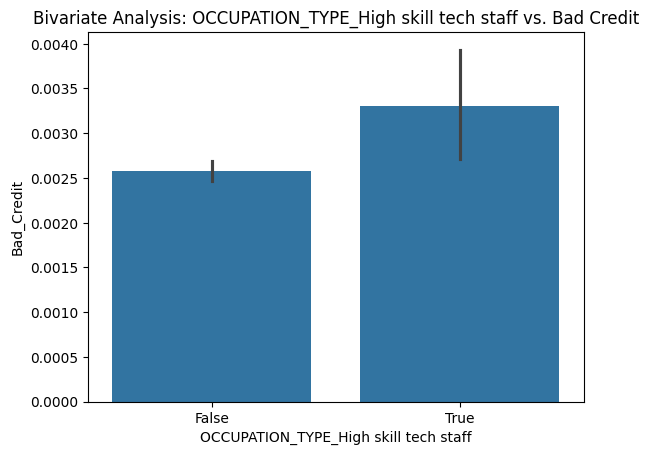

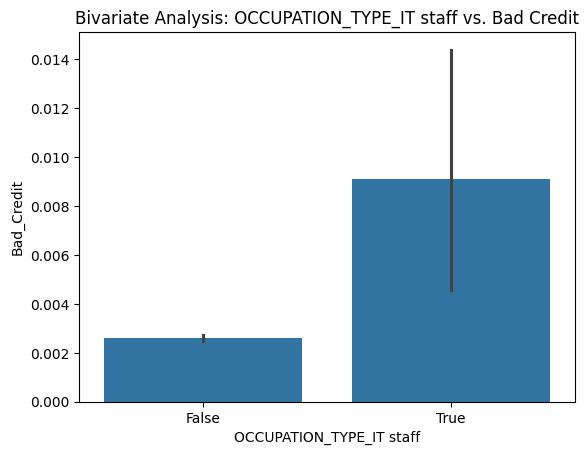

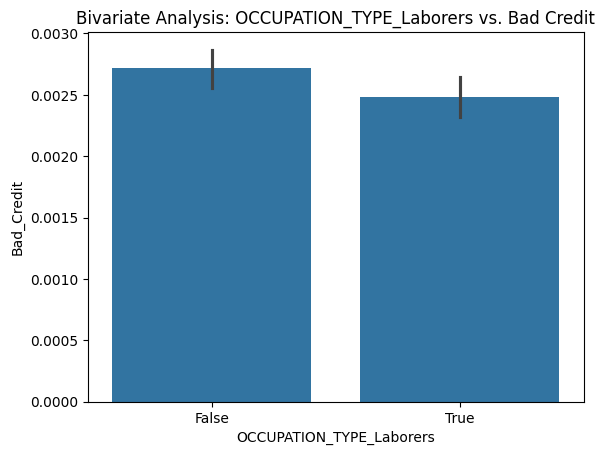

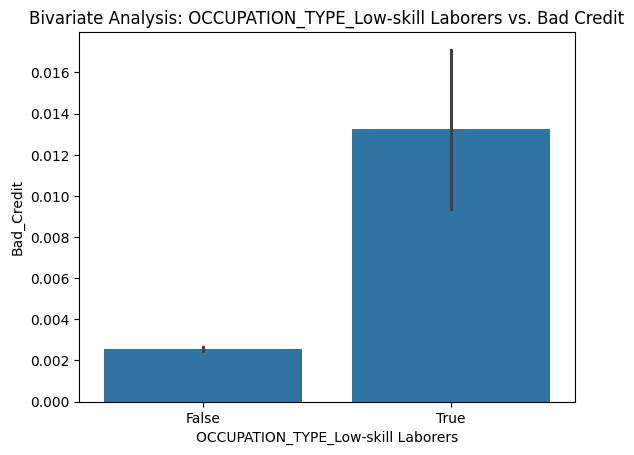

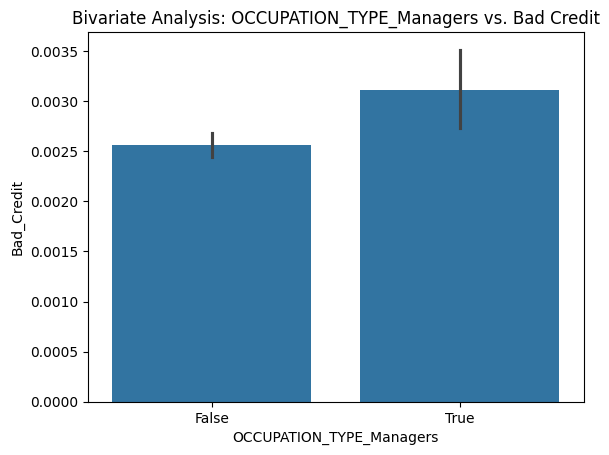

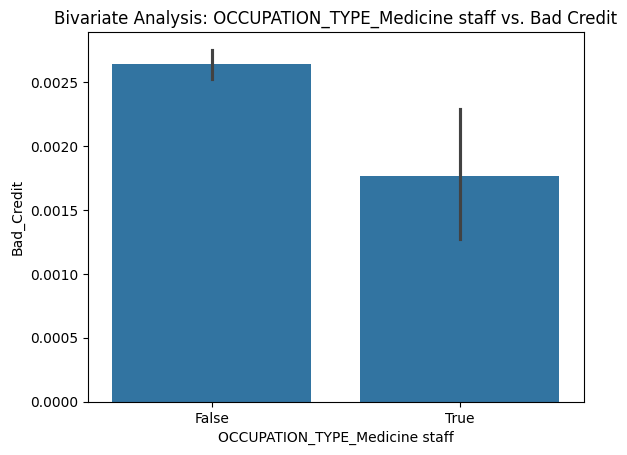

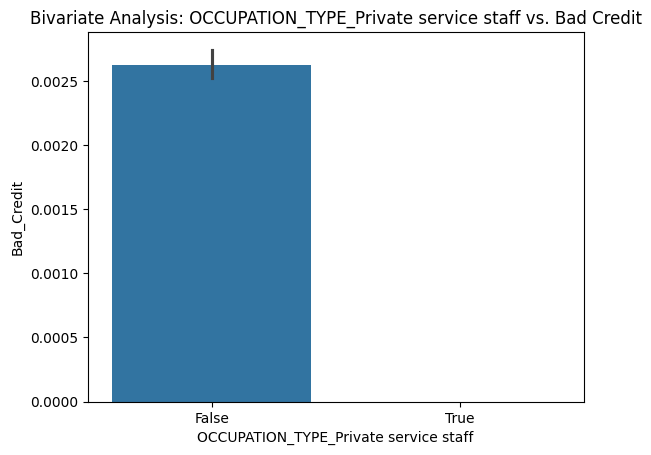

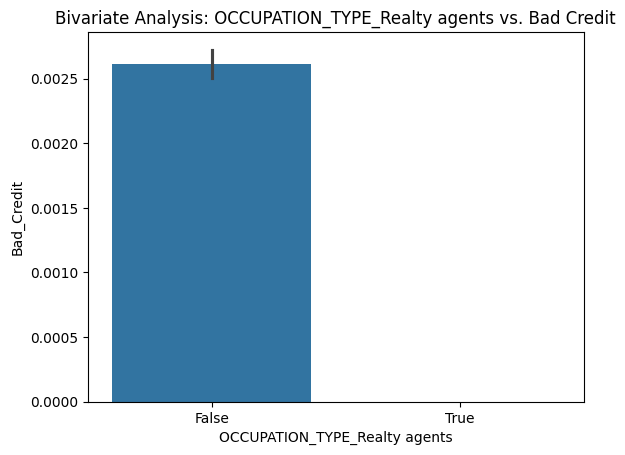

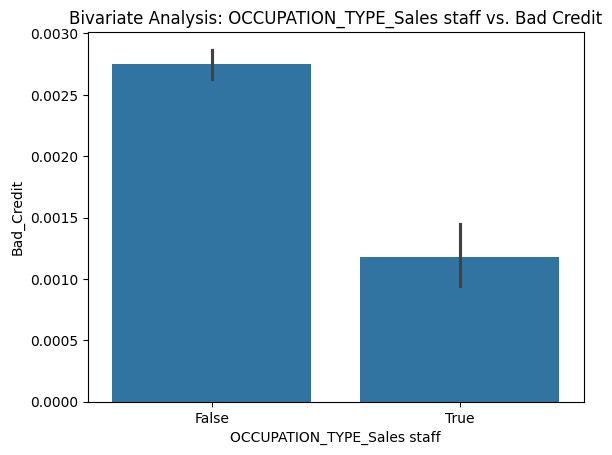

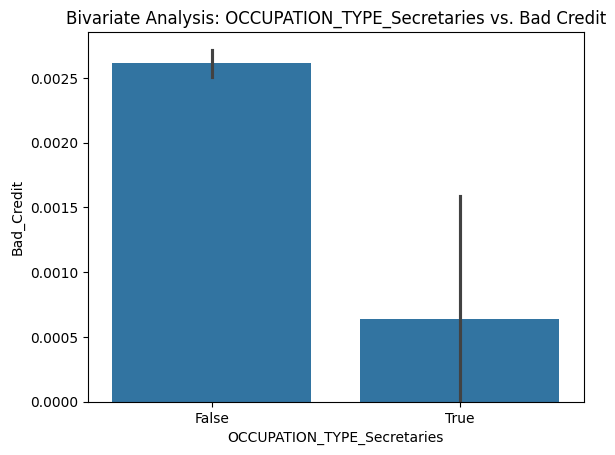

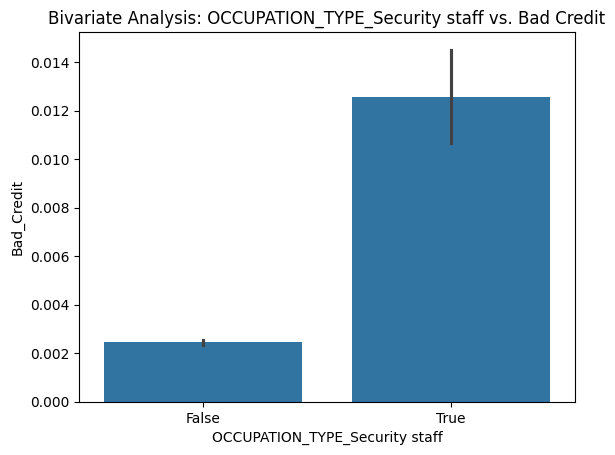

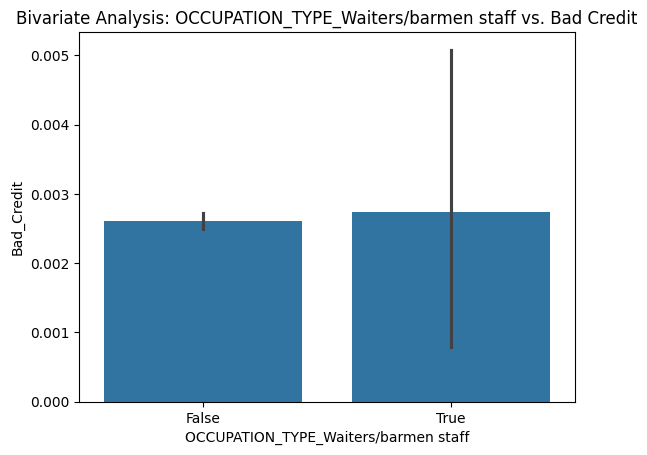

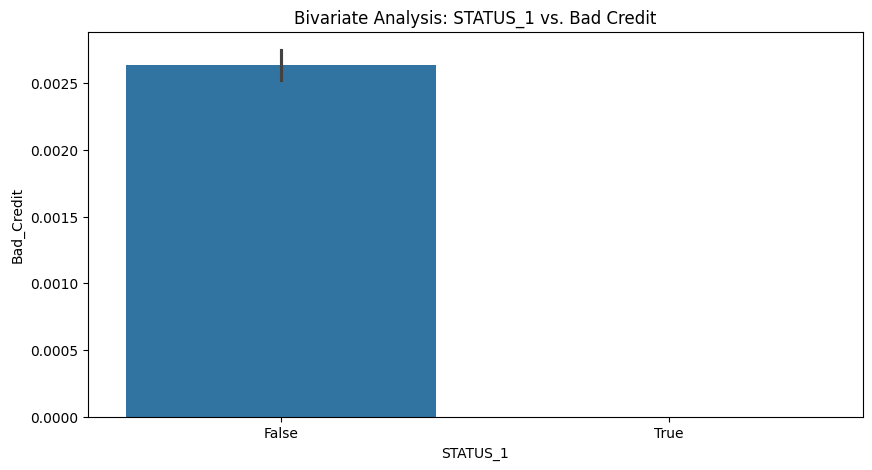

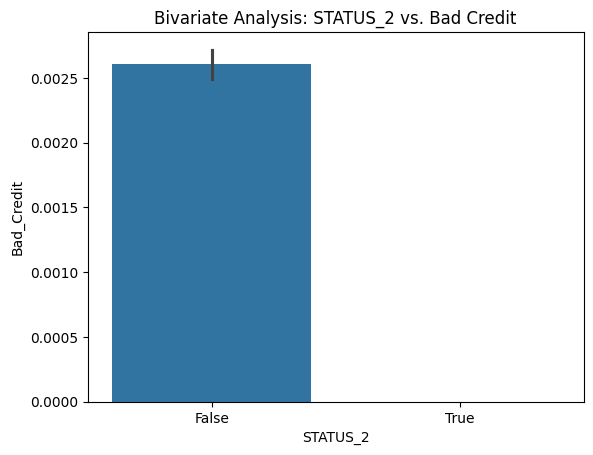

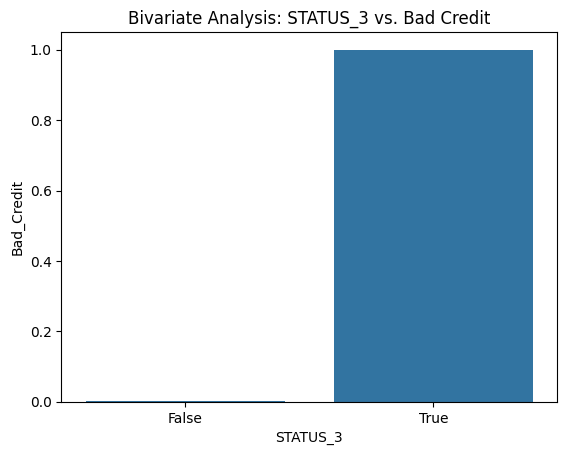

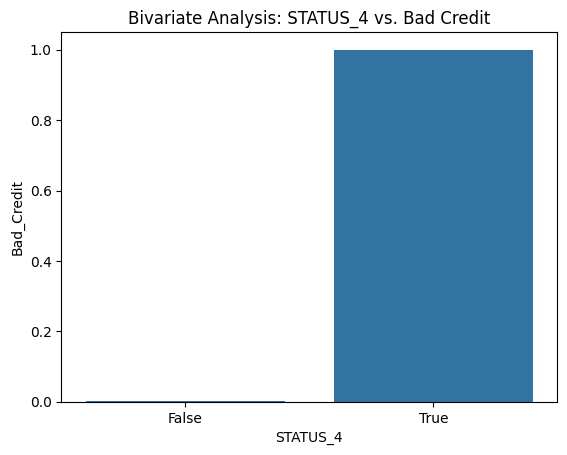

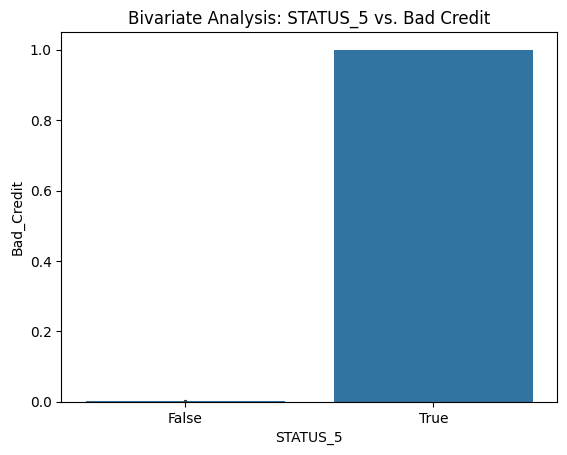

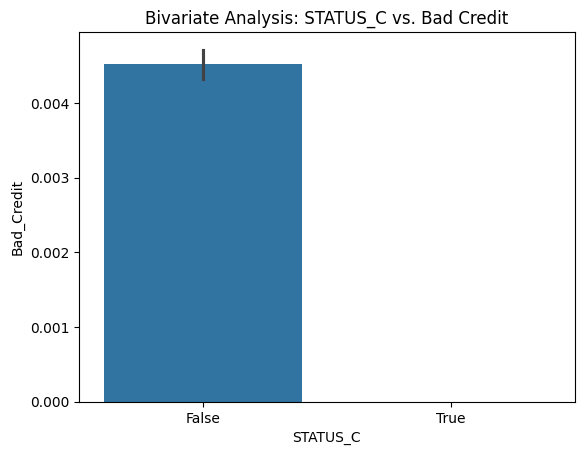

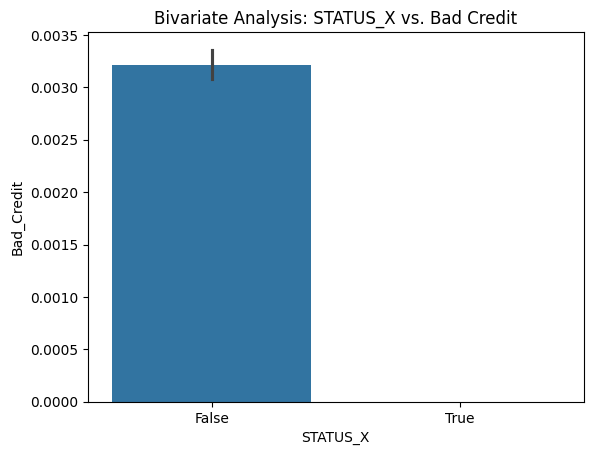

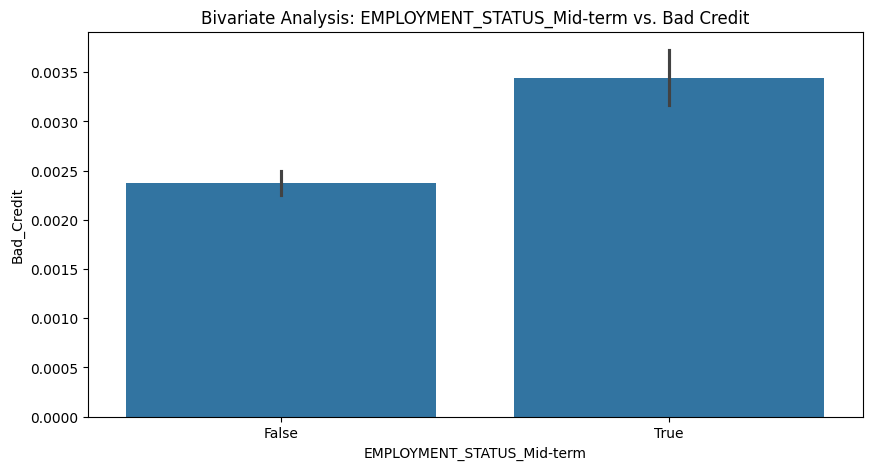

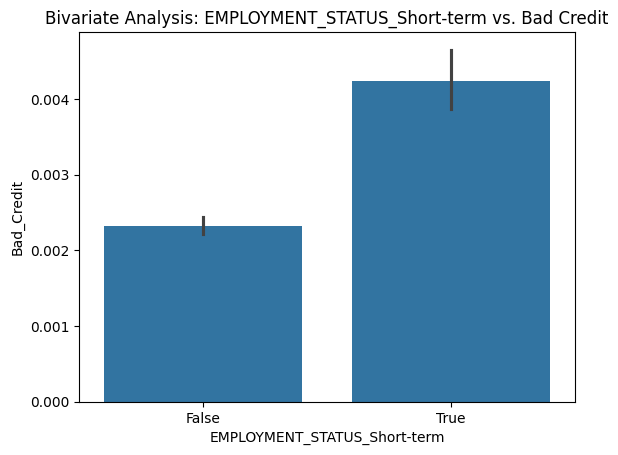

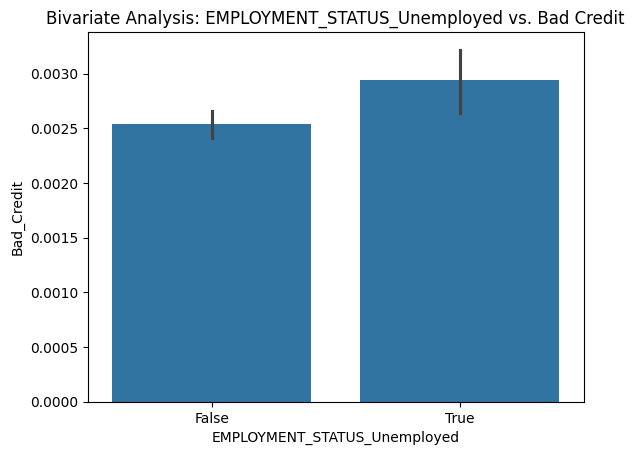

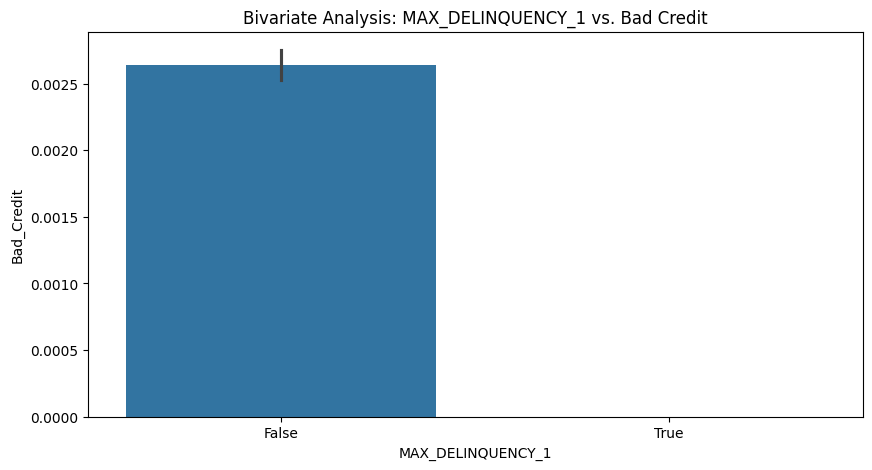

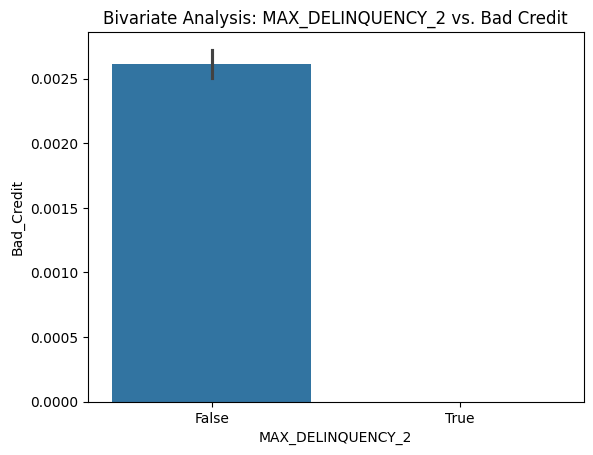

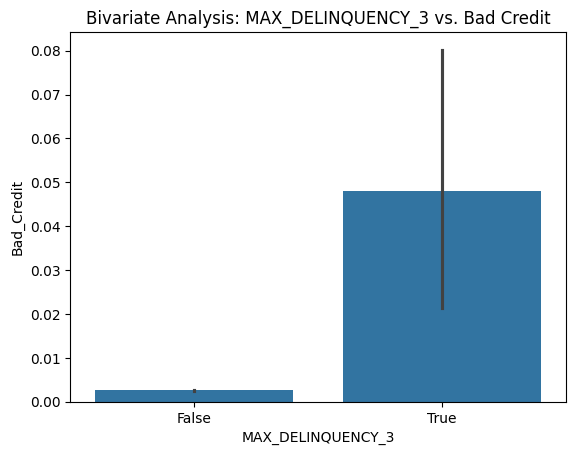

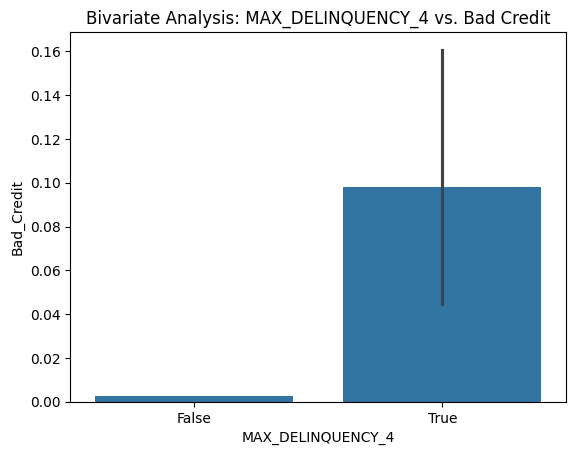

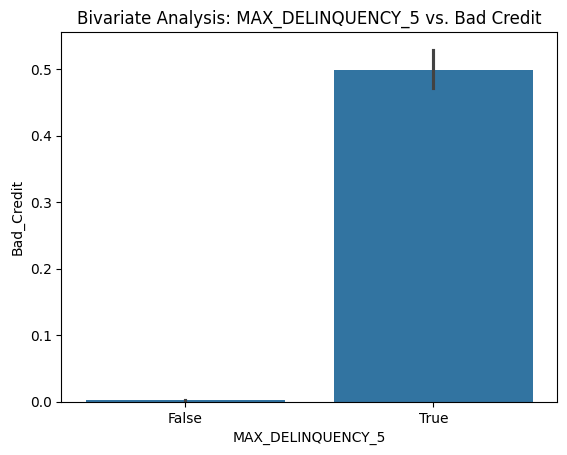

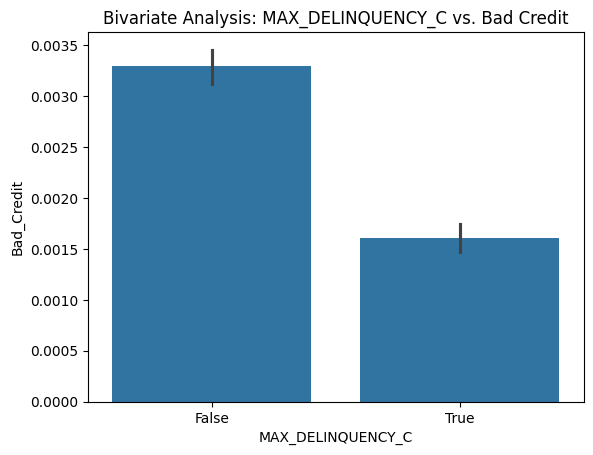

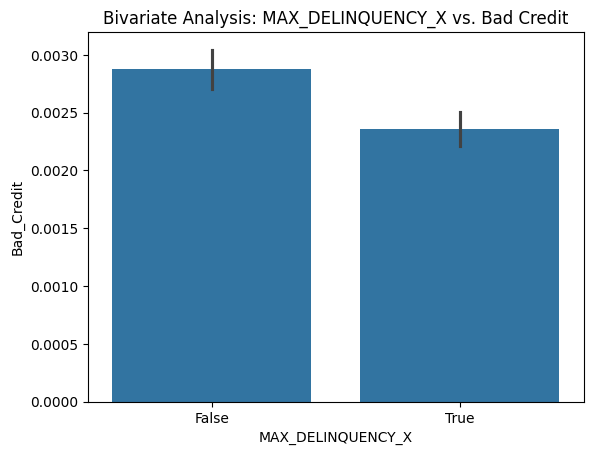

In [48]:
categorical_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS', 'EMPLOYMENT_STATUS', 'MAX_DELINQUENCY']

# Bivariate analysis for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    # Get the one-hot encoded column names for the current categorical variable
    encoded_cols = [col for col in merged_df.columns if col.startswith(var + '_')]

    # If encoded columns exist, plot them
    if encoded_cols:
        for encoded_col in encoded_cols:
            sns.barplot(x=merged_df[encoded_col], y=merged_df['Bad_Credit'])
            plt.title(f"Bivariate Analysis: {encoded_col} vs. Bad Credit")
            plt.show()
    else:
        print(f"No encoded columns found for {var}. Skipping.") # Added for cases where the variable is not encoded